<a href="https://colab.research.google.com/github/dinachoir/Convolutional-Neural-Network/blob/main/Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Convolutional Neural Network**

## **Data**

In [ ]:
import zipfile

# download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2022-06-24 11:34:09--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.99.128, 142.250.107.128, 173.194.202.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.99.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   346MB/s    in 0.3s    

2022-06-24 11:34:09 (346 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
# unzip the downloaded file
zip_file = zipfile.ZipFile("pizza_steak.zip", "r")
zip_file.extractall()
zip_file.close()

In [ ]:
# inspect each of the directories of the data 
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/test/

pizza  steak


In [ ]:
!ls pizza_steak/test/pizza/

1001116.jpg  1507019.jpg  2242047.jpg  2944567.jpg  3669673.jpg  556507.jpg
1032754.jpg  1512557.jpg  22489.jpg    296426.jpg   3724187.jpg  565112.jpg
103708.jpg   153195.jpg   2250611.jpg  2971095.jpg  3724353.jpg  573054.jpg
1060407.jpg  1555015.jpg  226472.jpg   2992605.jpg  3724416.jpg  614236.jpg
106507.jpg   1594097.jpg  2265512.jpg  2997525.jpg  3728155.jpg  614981.jpg
1067986.jpg  1618659.jpg  2276783.jpg  300157.jpg   3729167.jpg  61656.jpg
1106738.jpg  1636919.jpg  2296393.jpg  3042459.jpg  373847.jpg	 625434.jpg
1119571.jpg  1655630.jpg  2320458.jpg  3049449.jpg  3754474.jpg  645087.jpg
11297.jpg    1686938.jpg  2323860.jpg  3092704.jpg  3758160.jpg  648055.jpg
1152100.jpg  1687143.jpg  2343304.jpg  309892.jpg   376625.jpg	 65128.jpg
1179703.jpg  1691503.jpg  2392727.jpg  3174637.jpg  3770514.jpg  666569.jpg
1180001.jpg  1694874.jpg  2398925.jpg  321526.jpg   3784357.jpg  678708.jpg
1180273.jpg  1765727.jpg  2406842.jpg  3216107.jpg  3785667.jpg  714866.jpg
1183595.jpg  177

The pizza_steak data is already split into train and test directories.
1. A train directory which contains all of the images in the training dataset with subdirectories each named after "pizza" and "steak" containing images of that class.
2. A test directory has the same structure as the train directory.

In [ ]:
import os 

# walkthrough pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


So, the training dataset contains 750 images each class (pizza and steak) and testing dataset contains 250 images each class.

In [ ]:
# find out how many images are in a file (alternative)
num_pizza_images_test = len(os.listdir("pizza_steak/test/pizza"))
num_pizza_images_test

250

In [ ]:
# get the class names (alternative)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn training path into python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # create a list of class_names from subdirectories
print(class_names)

['pizza' 'steak']


In [ ]:
# view the image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # setup target directory
  target_folder = target_dir+target_class

  # get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # read the image and plot it
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # the shape of the image

  return img

Image shape: (512, 512, 3)
Image shape: (384, 512, 3)


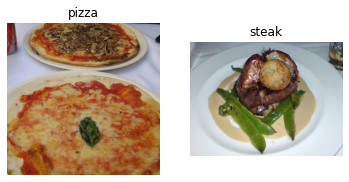

In [ ]:
# view a random image
plt.figure()
plt.subplot(1,2,1)
pizza_img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

plt.subplot(1,2,2)
steak_img = view_random_image("pizza_steak/train/", "steak")

The image shape (512, 512, 3) respectively shows (width, height, color channels). Because we're dealing with colored images, the color channel is 3 for JPG image respresent Red Green Blue (RGB) pixels (4 for PNG images).

In [ ]:
# view the tensor of img
pizza_img

array([[[136,  27,  24],
        [138,  30,  27],
        [135,  30,  26],
        ...,
        [ 15,  13,  16],
        [ 16,  14,  17],
        [ 16,  14,  17]],

       [[136,  27,  24],
        [138,  30,  27],
        [135,  30,  26],
        ...,
        [ 16,  14,  15],
        [ 17,  15,  16],
        [ 17,  15,  16]],

       [[136,  27,  24],
        [138,  30,  27],
        [135,  30,  26],
        ...,
        [ 14,  15,  10],
        [ 14,  15,  10],
        [ 15,  16,  11]],

       ...,

       [[175, 167, 120],
        [177, 166, 120],
        [175, 162, 117],
        ...,
        [155, 125,  71],
        [152, 125,  72],
        [151, 123,  73]],

       [[178, 170, 123],
        [179, 168, 122],
        [175, 162, 117],
        ...,
        [149, 119,  65],
        [150, 120,  68],
        [148, 120,  70]],

       [[181, 175, 127],
        [180, 172, 125],
        [173, 160, 115],
        ...,
        [149, 119,  65],
        [150, 120,  68],
        [151, 121,  71]]

1. The value in img array are between 0 amd 255. This is because that's the possible range for red, green, and blue values.

2. The model will be finding patterns in these different pixel values which determine what each class looks like.

3. Many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. That's why, one of the most common preprocessing steps for working with images is to scale (also referred to as normalize) their pixel values by dividing the image arrays by 255.

In [ ]:
# scale the pixel values between 0 and 1
pizza_img/255.

array([[[0.53333333, 0.10588235, 0.09411765],
        [0.54117647, 0.11764706, 0.10588235],
        [0.52941176, 0.11764706, 0.10196078],
        ...,
        [0.05882353, 0.05098039, 0.0627451 ],
        [0.0627451 , 0.05490196, 0.06666667],
        [0.0627451 , 0.05490196, 0.06666667]],

       [[0.53333333, 0.10588235, 0.09411765],
        [0.54117647, 0.11764706, 0.10588235],
        [0.52941176, 0.11764706, 0.10196078],
        ...,
        [0.0627451 , 0.05490196, 0.05882353],
        [0.06666667, 0.05882353, 0.0627451 ],
        [0.06666667, 0.05882353, 0.0627451 ]],

       [[0.53333333, 0.10588235, 0.09411765],
        [0.54117647, 0.11764706, 0.10588235],
        [0.52941176, 0.11764706, 0.10196078],
        ...,
        [0.05490196, 0.05882353, 0.03921569],
        [0.05490196, 0.05882353, 0.03921569],
        [0.05882353, 0.0627451 , 0.04313725]],

       ...,

       [[0.68627451, 0.65490196, 0.47058824],
        [0.69411765, 0.65098039, 0.47058824],
        [0.68627451, 0

## **Modeling Experiment**

1. Import and visualize the data
2. Preprocess the data
  1. **Scaling data**
  2. **Turn data into batches**. A batch is a small subset of the dataset a model looks at during training. For example batch_size = 32 means the model only looks at 32 images at a time. There are many batch size we could use, but 32 has proven to be very effective inmany different use cases and is often the default for many data preprocessing functions. The huge batch size (e.g. 10,000) might not fit into the memory of processor. Also, trying to learn the patterns in huge amounts of image (like 10,000) in one hit could result not being able to learn very well.
3. Create a model
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model

### **Model 1**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# preprocess data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# setup the train and test directory paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224,224), # convert all image to 224 X 224 in size, why? because 224x224 is the ideal image size that already contains the necessary information of the image itself (the pattern)
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32, # why 32? 32 is the common size used by scientists that already proven gives the optimum result
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# create a CNN model 
model_1 = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(filters=10,
                                    kernel_size=3, # same as (3,3)
                                    activation="relu",
                                    input_shape=(224,224,3)),
            tf.keras.layers.Conv2D(10,3, activation="relu"),
            tf.keras.layers.MaxPool2D(pool_size=2, # same as (2,2)
                                      padding="valid"),
            tf.keras.layers.Conv2D(10,3, activation="relu"),
            tf.keras.layers.Conv2D(10,3, activation="relu"),
            tf.keras.layers.MaxPool2D(2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,                        
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 12s 218ms/step - loss: 0.5706 - accuracy: 0.6860 - val_loss: 0.4208 - val_accuracy: 0.8000
Epoch 2/5
47/47 [==============================] - 9s 197ms/step - loss: 0.4164 - accuracy: 0.8167 - val_loss: 0.3313 - val_accuracy: 0.8640
Epoch 3/5
47/47 [==============================] - 9s 198ms/step - loss: 0.3833 - accuracy: 0.8327 - val_loss: 0.2976 - val_accuracy: 0.8700
Epoch 4/5
47/47 [==============================] - 9s 199ms/step - loss: 0.3432 - accuracy: 0.8627 - val_loss: 0.2894 - val_accuracy: 0.8800
Epoch 5/5
47/47 [==============================] - 9s 198ms/step - loss: 0.3217 - accuracy: 0.8653 - val_loss: 0.3210 - val_accuracy: 0.8620


The model got 86% accuracy on training set and 84.8% accuracy on testing set.

In [ ]:
# check out the layers of model_1
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_11 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

A **convolutional layer** seeks to sort out and learn the most important patterns in an image. 

Meanwhile **dense layers** have higher number of possible learnable patterns because the layers are fully connected. That's why dense layers have more trainable parameters. 

The more number of paramaters doesn't guarantee the higher accuracy of the model. Adding layers or increasing the number of neurons in each layer is often referred to as increasing the complexity of the model.

### **Model 2**

In [ ]:
# preprocess data, create train and test data generators and rescale the data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# setup the train and test directory paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224,224), 
                                               class_mode="binary")

test_data = test_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary")

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# get the sample of the training data batch
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [ ]:
# view the images
images[:2], images[0].shape

(array([[[[0.427451  , 0.24313727, 0.07058824],
          [0.4156863 , 0.24313727, 0.06666667],
          [0.39607847, 0.22352943, 0.04705883],
          ...,
          [0.47450984, 0.28235295, 0.12156864],
          [0.48235297, 0.2901961 , 0.12941177],
          [0.48235297, 0.2901961 , 0.12941177]],
 
         [[0.40000004, 0.21568629, 0.04313726],
          [0.4039216 , 0.23137257, 0.05490196],
          [0.427451  , 0.25490198, 0.07843138],
          ...,
          [0.46274513, 0.27058825, 0.10980393],
          [0.46274513, 0.27058825, 0.10980393],
          [0.4666667 , 0.27450982, 0.1137255 ]],
 
         [[0.41176474, 0.227451  , 0.05490196],
          [0.39607847, 0.22352943, 0.04705883],
          [0.39607847, 0.22352943, 0.04705883],
          ...,
          [0.43921572, 0.24705884, 0.08627451],
          [0.45882356, 0.26666668, 0.10588236],
          [0.46274513, 0.27058825, 0.10980393]],
 
         ...,
 
         [[0.38431376, 0.34901962, 0.3137255 ],
          [0.40392

In [ ]:
# view the first batch of labels
labels

array([0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1.],
      dtype=float32)

In [ ]:
# create a model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
model_2 = Sequential([
              Conv2D(filters=10,
                     kernel_size=3,
                     strides=1,
                     padding="valid",
                     activation="relu",
                     input_shape=(224,224,3)), # input layer
              Conv2D(10,3, activation="relu"),
              Conv2D(10,3, activation="relu"),
              Flatten(),
              Dense(1, activation="sigmoid") # output layer
])

**Typical CNN architecture:**

Input --> Conv + Relu layers --> Pooling layer --> Fully connected layer (Dense layer) as Output

**The components of the Conv2D layer:**
1. The "2D" means our inputs are two dimensional (height and width), even though they have 3 colour channels, the convolutions are run on each channel invididually.
2. **filters** - these are the number of "feature extractors" that will be moving over the images.
3. **kernel_size** - the size of our filters, for example, a kernel_size of (3, 3) (or just 3) will mean each filter will have the size 3x3, meaning it will look at a space of 3x3 pixels each time. The smaller the kernel, the more fine-grained features it will extract.
4. **strides** - the number of pixels a filter will move across as it covers the image. A stride of 1 means the filter moves across each pixel 1 by 1. A stride of 2 means it moves 2 pixels at a time.
5. **padding** - this can be either 'same' or 'valid', 'same' adds zeros the to outside of the image so the resulting output of the convolutional layer is the same as the input, where as 'valid' (default) cuts off excess pixels where the filter doesn't fit (e.g. 224 pixels wide divided by a kernel size of 3 (224/3 = 74.6) means a single pixel will get cut off the end.

A **feature** can be considered any significant part of an image. For example, a feature might be the sharp edges of a pizza. The features are defined by model through learning them as it applies different filters accross the image. 

In [ ]:
# compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# check the length of training and testing data generators
len(train_data), len(test_data)

(47, 16)

**Parameters in model fitting:**

1. **steps_per_epoch** - the number of batches a model will go through per epoch. If we want the model to go through all batches so it's equal to the length of train_data. In this case, 1500 training images in batches of 32, there will be 1500/32 = 47 steps per epoch.
2. **validation_steps** - same as step per epoch, except for the validation_data. In this case, 500 testing images in batches of 32, there will be 500/32 = 16 validation steps.

In [ ]:
# fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 203ms/step - loss: 1.5018 - accuracy: 0.6133 - val_loss: 0.4942 - val_accuracy: 0.7640
Epoch 2/5
47/47 [==============================] - 9s 196ms/step - loss: 0.4693 - accuracy: 0.7867 - val_loss: 0.4262 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 9s 197ms/step - loss: 0.3847 - accuracy: 0.8447 - val_loss: 0.3947 - val_accuracy: 0.8200
Epoch 4/5
47/47 [==============================] - 9s 197ms/step - loss: 0.2741 - accuracy: 0.9013 - val_loss: 0.3650 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 9s 196ms/step - loss: 0.1542 - accuracy: 0.9587 - val_loss: 0.3653 - val_accuracy: 0.8300


In [ ]:
# evaluate the model

## plot loss and accuracy curves
def plot_loss_accuracy(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # plot loss
  plt.plot(epochs, loss, label='train_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss Curves')
  plt.xlabel('Epochs')
  plt.legend()

  # plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='train_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy Curves')
  plt.xlabel('Epochs')
  plt.legend()

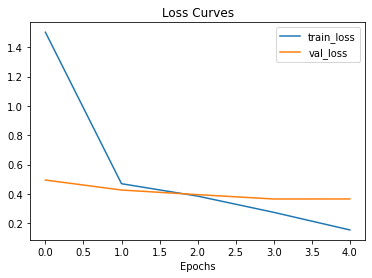

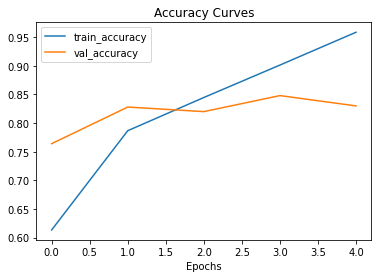

In [ ]:
# plot loss and accuracy model_2
plot_loss_accuracy(history_2)

The ideal loss and accuracy curves is to converge each other. The validation loss should be slightly under the training curve. If the gap of both loss curves is diverge along the epochs, it indicates that the model probably overfitting.

In [ ]:
# Check the model architecture
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### **Model 3 : Adjust the model parameters**

Adding a MaxPool2D() layer after each convolutional layer.

In [ ]:
model_3 = Sequential([
              Conv2D(filters=10,
                     kernel_size=3,
                     strides=1,
                     padding="valid",
                     activation="relu",
                     input_shape=(224,224,3)), # input layer
              MaxPool2D(pool_size=2), # reduce the number of feature by half
              Conv2D(10,3, activation="relu"),
              MaxPool2D(),
              Conv2D(10,3, activation="relu"),
              MaxPool2D(),
              Flatten(),
              Dense(1, activation="sigmoid") # output layer
])

# compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 190ms/step - loss: 0.6257 - accuracy: 0.6300 - val_loss: 0.4625 - val_accuracy: 0.7960
Epoch 2/5
47/47 [==============================] - 9s 185ms/step - loss: 0.4355 - accuracy: 0.8120 - val_loss: 0.3486 - val_accuracy: 0.8540
Epoch 3/5
47/47 [==============================] - 9s 185ms/step - loss: 0.4089 - accuracy: 0.8127 - val_loss: 0.3683 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 9s 183ms/step - loss: 0.3810 - accuracy: 0.8440 - val_loss: 0.3265 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 9s 183ms/step - loss: 0.3562 - accuracy: 0.8493 - val_loss: 0.3196 - val_accuracy: 0.8680


**Model_3** is performing worse in training set, but better in validation set than Model_2.

In [ ]:
# Check the model architecture
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

**MaxPool2D layer** only takes the most important features in the image and get rid of the rest. That's why total trainable parameters in model_3 less than model_2. The bigger pool_size parameter, the more the max pooling layer will squeeze the features out the image. However too big pool_size will make the model can't learn anything.

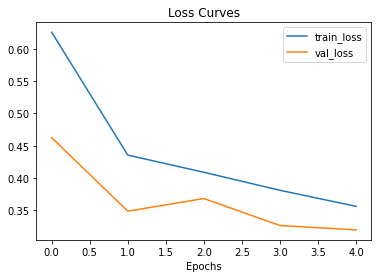

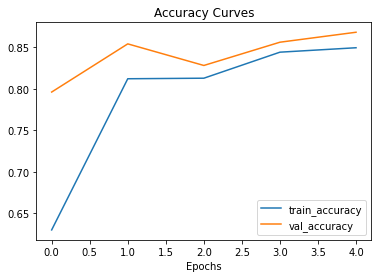

In [ ]:
# evaluate the model_3
plot_loss_accuracy(history_3)

### **Model 4 : Implementing Data Augmentation**

To prevent overfitting in model, apply data augmentation into training dataset.

**Data Augmentation** is the process of altering training data, so the training data can be more diverse and the model can learn more generalizable patterns. Altering might mean adjusting the rotation of the image, flipping it, cropping it, or else. This means the model will be forced to learn patterns in less-perfect images, which is often when using real-world images.

Using the **ImageDataGenerator** built-in data augmentation parameters, the images are randomly manipulated when loaded into the model.

In [ ]:
# create ImageDataGenerator training with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                             rotation_range=20,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

# create ImageDataGenerator training and validation without data augmentation
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# import data and augment it from training directory for image comparison
print('Augmented Training Images:')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # dont shuffle for demonstration purpose, compare with the original images

# create non augmented data batches
print('Non-Augmented Training Images:')
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224,224), 
                                               class_mode="binary", 
                                               shuffle=False)

Augmented Training Images:
Found 1500 images belonging to 2 classes.
Non-Augmented Training Images:
Found 1500 images belonging to 2 classes.


**Turning off data shuffling** using **shuffle=False** makes the model only sees a batch of a single kind of images at a time.

For instance, the pizza class gets loaded in first because it is the first class in directory. Thus, model training performance is measured on only a single class rather than both classes. Meanwhile model validation performance improves steadily because it contains shuffled images.

In [ ]:
# view data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # the labels aren't augmented

(-0.5, 223.5, 223.5, -0.5)

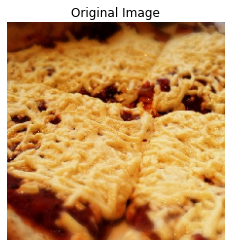

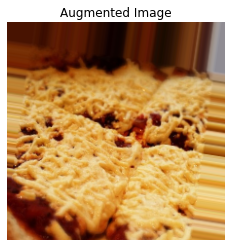

In [ ]:
# View the original image and augmented image
random_number = random.randint(0,32)
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False)

plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Image")
plt.axis(False)

In [ ]:
# import data and augment it from training and testing directory for modeling 
print('Augmented Training Images:')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=True) # Set shuffle=True for modeling

test_data = test_datagen.flow_from_directory(test_dir,
                                               batch_size=32, 
                                               target_size=(224,224),
                                               class_mode="binary")

Augmented Training Images:
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# create the model
model_4 = Sequential([
              Conv2D(filters=10,
                     kernel_size=3,
                     strides=1,
                     padding="valid",
                     activation="relu",
                     input_shape=(224,224,3)), # input layer
              MaxPool2D(pool_size=2), # reduce the number of feature by half
              Conv2D(10,3, activation="relu"),
              MaxPool2D(),
              Conv2D(10,3, activation="relu"),
              MaxPool2D(),
              Flatten(),
              Dense(1, activation="sigmoid") # output layer
])

# compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# fit the model
history_4 = model_4.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 519ms/step - loss: 0.6426 - accuracy: 0.6247 - val_loss: 0.5310 - val_accuracy: 0.8060
Epoch 2/5
47/47 [==============================] - 22s 468ms/step - loss: 0.5223 - accuracy: 0.7407 - val_loss: 0.3592 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 22s 464ms/step - loss: 0.4969 - accuracy: 0.7573 - val_loss: 0.4111 - val_accuracy: 0.8140
Epoch 4/5
47/47 [==============================] - 22s 470ms/step - loss: 0.5044 - accuracy: 0.7480 - val_loss: 0.3861 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 22s 465ms/step - loss: 0.4790 - accuracy: 0.7653 - val_loss: 0.3890 - val_accuracy: 0.8220


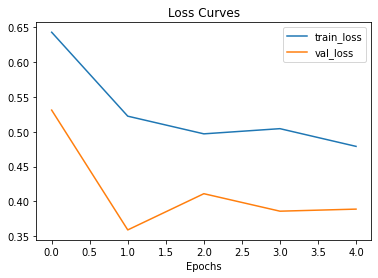

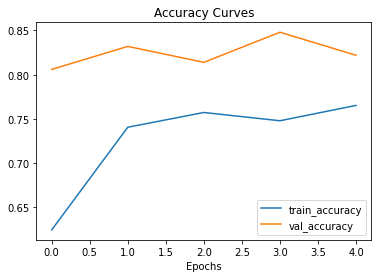

In [ ]:
# evaluate model performance
plot_loss_accuracy(history_4)

### **Model 5 : Improving Model**

Adding more conv2D layers

In [ ]:
# create the model
model_5 = Sequential([
              Conv2D(filters=10,
                     kernel_size=3,
                     strides=1,
                     padding="valid",
                     activation="relu",
                     input_shape=(224,224,3)), # input layer
              Conv2D(10,3, activation="relu"),
              MaxPool2D(pool_size=2), # reduce the number of feature by half
              Conv2D(10,3, activation="relu"),
              Conv2D(10,3, activation="relu"),
              MaxPool2D(),
              Flatten(),
              Dense(1, activation="sigmoid") # output layer
])

# compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# fit the model
history_5 = model_5.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 490ms/step - loss: 0.7007 - accuracy: 0.5567 - val_loss: 0.5992 - val_accuracy: 0.7420
Epoch 2/5
47/47 [==============================] - 23s 482ms/step - loss: 0.6267 - accuracy: 0.6607 - val_loss: 0.5077 - val_accuracy: 0.7620
Epoch 3/5
47/47 [==============================] - 22s 478ms/step - loss: 0.5850 - accuracy: 0.7213 - val_loss: 0.5130 - val_accuracy: 0.7460
Epoch 4/5
47/47 [==============================] - 23s 480ms/step - loss: 0.5228 - accuracy: 0.7567 - val_loss: 0.3941 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 22s 475ms/step - loss: 0.4940 - accuracy: 0.7687 - val_loss: 0.3442 - val_accuracy: 0.8620


In [ ]:
# check model architecture
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_14 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_16 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

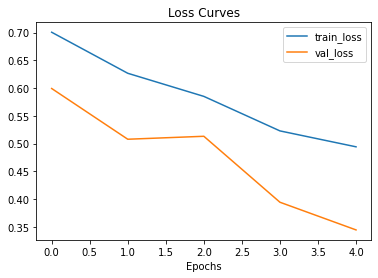

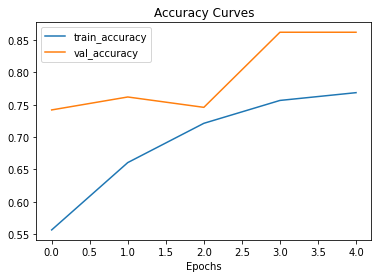

In [ ]:
# evaluate model
plot_loss_accuracy(history_5)

#### **Make a Prediction**

--2022-06-24 05:41:19--  https://raw.githubusercontent.com/dinachoir/Convolutional-Neural-Network/main/01-pizza.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58043 (57K) [image/jpeg]
Saving to: ‘01-pizza.jpg’

01-pizza.jpg        100%[===================>]  56.68K  --.-KB/s    in 0.001s  

2022-06-24 05:41:19 (48.4 MB/s) - ‘01-pizza.jpg’ saved [58043/58043]



(-0.5, 611.5, 458.5, -0.5)

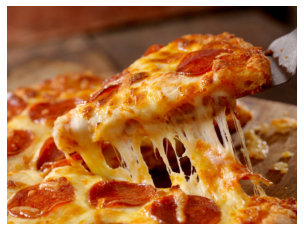

In [ ]:
# view example image
!wget https://raw.githubusercontent.com/dinachoir/Convolutional-Neural-Network/main/01-pizza.jpg
pizza = mpimg.imread("01-pizza.jpg")
plt.imshow(pizza)
plt.axis(False)

In [ ]:
# check the shape of image
pizza.shape

(459, 612, 3)

In [ ]:
# create function to import an image and resize it so it can be used in model

def load_prep_image(filename,img_shape=224):
  """
  read an image from filename, turn it into a tensor, and reshape it to (img_shape, img_shape, color_channel)
  """
  # read image from the target file
  img = tf.io.read_file(filename)

  # decode image into tensor (use 3 color channel)
  img = tf.image.decode_image(img, channels=3)

  # resize the image to the same size as the model has been trained on
  img = tf.image.resize(img, size=[img_shape, img_shape])

  # rescale the image
  img = img/255.

  return img

In [ ]:
# load and preprocess the example image
pizza = load_prep_image("01-pizza.jpg")
pizza

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.5137255 , 0.23921569, 0.13725491],
        [0.507458  , 0.23294818, 0.1309874 ],
        [0.5045869 , 0.23007703, 0.12811625],
        ...,
        [0.19143058, 0.11692079, 0.05025413],
        [0.22433484, 0.14667371, 0.07685571],
        [0.23974107, 0.15738812, 0.08287832]],

       [[0.5159751 , 0.24146535, 0.13950455],
        [0.5107078 , 0.236198  , 0.1342372 ],
        [0.5058824 , 0.23137255, 0.12941177],
        ...,
        [0.18339488, 0.10888508, 0.04221841],
        [0.21772176, 0.14006063, 0.07024263],
        [0.2358195 , 0.15346655, 0.07895675]],

       [[0.51797414, 0.24346435, 0.14150356],
        [0.51470673, 0.24019694, 0.13823617],
        [0.50980395, 0.23529412, 0.13333334],
        ...,
        [0.17143759, 0.09692779, 0.03026113],
        [0.20789671, 0.13023557, 0.06041758],
        [0.23370446, 0.15135153, 0.07684172]],

       ...,

       [[0.91922265, 0.71578836, 0.33472037],
        [0.93

In [ ]:
# add an extra dimension at axis = 0 because the model was trained on data in the shape of (batch_size, 224, 224, 3)
pizza = tf.expand_dims(pizza, axis=0)
print(f"Image shape after expand the dimension: {pizza.shape}")
pizza

Image shape after expand the dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.5137255 , 0.23921569, 0.13725491],
         [0.507458  , 0.23294818, 0.1309874 ],
         [0.5045869 , 0.23007703, 0.12811625],
         ...,
         [0.19143058, 0.11692079, 0.05025413],
         [0.22433484, 0.14667371, 0.07685571],
         [0.23974107, 0.15738812, 0.08287832]],

        [[0.5159751 , 0.24146535, 0.13950455],
         [0.5107078 , 0.236198  , 0.1342372 ],
         [0.5058824 , 0.23137255, 0.12941177],
         ...,
         [0.18339488, 0.10888508, 0.04221841],
         [0.21772176, 0.14006063, 0.07024263],
         [0.2358195 , 0.15346655, 0.07895675]],

        [[0.51797414, 0.24346435, 0.14150356],
         [0.51470673, 0.24019694, 0.13823617],
         [0.50980395, 0.23529412, 0.13333334],
         ...,
         [0.17143759, 0.09692779, 0.03026113],
         [0.20789671, 0.13023557, 0.06041758],
         [0.23370446, 0.15135153, 0.07684172]],

        ...,

        [[0.91922265, 0.71578836, 

In [ ]:
# make a prediction on image tensor
pred = model_5.predict(pizza)
pred

array([[0.07322126]], dtype=float32)

The result of **pred = model_5.predict(pizza)** is a prediction probability. Since the model is working on binary classification, if the prediction probability is over 0.5 (the default cut-off), it means that the image is more likely to be the positive class (Class 1 or Steak).

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# check prediction class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'pizza'

In [ ]:
# create a function to visualize the image and show the prediction class
def pred_view(model, filename, class_names):
  """
  Import an image from filename, predict the class name with a trained model
  and plot the image with the predicted class name
  """
  # import the image and preprocess it
  img = load_prep_image(filename)

  # make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # get the predicted class name
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # plot the image and the predicted class name
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

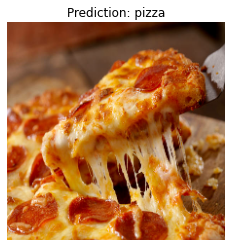

In [ ]:
pred_view(model_5, "01-pizza.jpg", class_names)

### **Model 6 : MultiClass Classification Model**

In [ ]:
# download 10 food classes images zipfile
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# unzip file
zip_file = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_file.extractall()
zip_file.close()

--2022-06-24 10:48:32--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.203.128, 74.125.20.128, 74.125.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   255MB/s    in 1.9s    

2022-06-24 10:48:34 (255 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os
# check out the directory and the number of files
for dirpath, dirnames, filenames, in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in '10_food_classes_all_data'
There are 10 directories and 0 images in '10_food_classes_all_data/test'
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'
There are 10 directori

In [ ]:
# setup the training and testing directory paths
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# get the all class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
# preprocess the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# rescale data and create data generator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# load the data from directory and turn into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
# create a model
model_6 = Sequential([
              Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
              Conv2D(10, 3, activation="relu"),
              MaxPool2D(),
              Conv2D(10, 3, activation="relu"),
              Conv2D(10, 3, activation="relu"),
              MaxPool2D(),
              Flatten(),
              Dense(10, activation="softmax")
])

# compile the model
model_6.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# fit the model
history_6 = model_6.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 59s 201ms/step - loss: 2.0928 - accuracy: 0.2403 - val_loss: 1.9132 - val_accuracy: 0.3200
Epoch 2/5
235/235 [==============================] - 47s 200ms/step - loss: 1.8473 - accuracy: 0.3635 - val_loss: 1.9278 - val_accuracy: 0.3156
Epoch 3/5
235/235 [==============================] - 48s 206ms/step - loss: 1.5661 - accuracy: 0.4775 - val_loss: 1.8715 - val_accuracy: 0.3628
Epoch 4/5
235/235 [==============================] - 47s 200ms/step - loss: 0.9663 - accuracy: 0.6847 - val_loss: 2.1799 - val_accuracy: 0.3212
Epoch 5/5
235/235 [==============================] - 47s 201ms/step - loss: 0.3795 - accuracy: 0.8825 - val_loss: 3.0352 - val_accuracy: 0.2860


In [ ]:
# evaluate the model
model_6.evaluate(test_data)

79/79 [==============================] - 11s 143ms/step - loss: 3.0352 - accuracy: 0.2860


[3.035215139389038, 0.28600001335144043]

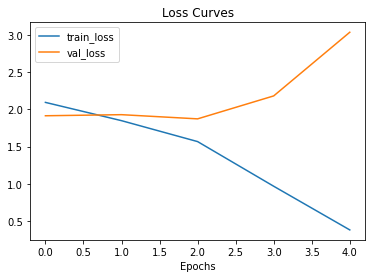

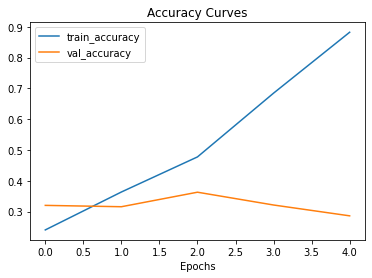

In [ ]:
# plot loss and accuracy
plot_loss_accuracy(history_6)

**Model_6** have great performance in training set, but fails to generalize patterns to new data so it performs poorly in testing set.

### **Model 7 : Simplify Layers**

In [ ]:
# create a model
model_7 = Sequential([
              Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
              MaxPool2D(),
              Conv2D(10, 3, activation="relu"),
              MaxPool2D(),
              Flatten(),
              Dense(10, activation="softmax")
])

# compile the model
model_7.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# fit the model
history_7 = model_7.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 46s 194ms/step - loss: 2.2769 - accuracy: 0.1729 - val_loss: 2.1520 - val_accuracy: 0.2260
Epoch 2/5
235/235 [==============================] - 46s 194ms/step - loss: 1.9607 - accuracy: 0.3131 - val_loss: 2.0966 - val_accuracy: 0.2324
Epoch 3/5
235/235 [==============================] - 45s 192ms/step - loss: 1.5960 - accuracy: 0.4700 - val_loss: 2.1950 - val_accuracy: 0.2464
Epoch 4/5
235/235 [==============================] - 45s 193ms/step - loss: 1.0985 - accuracy: 0.6544 - val_loss: 2.4903 - val_accuracy: 0.2504
Epoch 5/5
235/235 [==============================] - 44s 189ms/step - loss: 0.6109 - accuracy: 0.8196 - val_loss: 2.9498 - val_accuracy: 0.2400


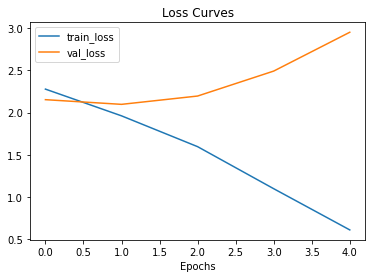

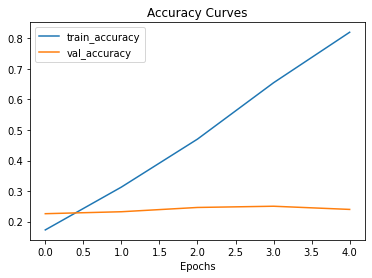

In [ ]:
# plot loss and accuracy
plot_loss_accuracy(history_7)

### **Model 8 : Implementing Data Augmentation**

In [ ]:
# create ImageDataGenerator training with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                             rotation_range=20,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="categorical") 

Found 7500 images belonging to 10 classes.


In [ ]:
# clone the model to use the same architecture as model_7
model_8 = tf.keras.models.clone_model(model_7)

# compile the cloned model
model_8.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# fit the model
history_8 = model_8.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 115s 487ms/step - loss: 2.1813 - accuracy: 0.2181 - val_loss: 1.9927 - val_accuracy: 0.2880
Epoch 2/5
235/235 [==============================] - 115s 488ms/step - loss: 2.0571 - accuracy: 0.2715 - val_loss: 1.9324 - val_accuracy: 0.3048
Epoch 3/5
235/235 [==============================] - 114s 487ms/step - loss: 2.0078 - accuracy: 0.2909 - val_loss: 1.9166 - val_accuracy: 0.3400
Epoch 4/5
235/235 [==============================] - 115s 491ms/step - loss: 1.9740 - accuracy: 0.3115 - val_loss: 1.8304 - val_accuracy: 0.3628
Epoch 5/5
235/235 [==============================] - 114s 485ms/step - loss: 1.9428 - accuracy: 0.3237 - val_loss: 1.8111 - val_accuracy: 0.3892


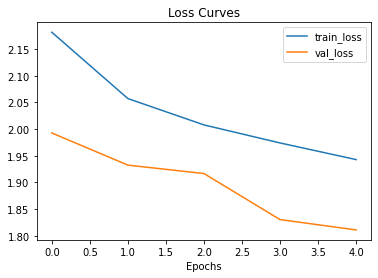

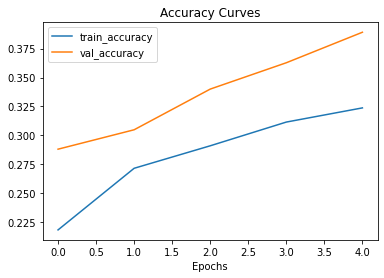

In [ ]:
# check model performance
plot_loss_accuracy(history_8)

#### **Make a Prediction**

In [ ]:
!wget -q https://raw.githubusercontent.com/dinachoir/Convolutional-Neural-Network/main/01-chicken_wings.jpg
!wget -q https://raw.githubusercontent.com/dinachoir/Convolutional-Neural-Network/main/01-pizza.jpg
!wget -q https://raw.githubusercontent.com/dinachoir/Convolutional-Neural-Network/main/01-fried_rice.jpg
!wget -q https://raw.githubusercontent.com/dinachoir/Convolutional-Neural-Network/main/01-ramen.jpg

In [ ]:
# make a prediction
def pred_view(model, filename, class_name):
  """
  Import an image from directory (filename), make a prediction of class name
  using a trained model
  """
  # import the image and preprocess it\
  img = load_prep_image(filename)

  # make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # get the class name prediction
  if len(pred[0]) > 1: # checking for multiclass classification
    pred_class = class_names[pred.argmax()] # the max value is the class
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # for binary
  
  # plot the image and predicted class name
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

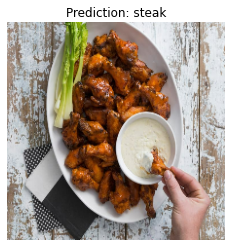

In [ ]:
pred_view(model_8, "01-chicken_wings.jpg", class_names)

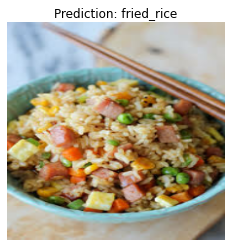

In [ ]:
pred_view(model_8, "01-fried_rice.jpg", class_names)

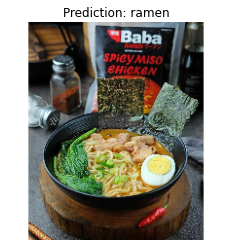

In [ ]:
pred_view(model_8, "01-ramen.jpg", class_names)

#### **Save the model**

In [ ]:
# evaluate model
model_8.evaluate(test_data)

79/79 [==============================] - 11s 140ms/step - loss: 1.8111 - accuracy: 0.3892


[1.8110902309417725, 0.38920000195503235]

In [ ]:
model_8.save("10_class_model_8")

INFO:tensorflow:Assets written to: 10_class_model_8/assets


In [ ]:
# load the saved model
loaded_model_8 = tf.keras.models.load_model("10_class_model_8")

In [ ]:
loaded_model_8.evaluate(test_data)

79/79 [==============================] - 12s 146ms/step - loss: 1.8111 - accuracy: 0.3892


[1.8110905885696411, 0.38920000195503235]

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/content/job_data_analyst_details.csv')
data.head()

Unnamed: 0                                          Job Title  \
0           0  Data Analyst, Center on Immigration and Justic...   
1           1                               Quality Data Analyst   
2           2  Senior Data Analyst, Insights & Analytics Team...   
3           3                                       Data Analyst   
4           4                             Reporting Data Analyst   

              Salary Estimate  \
0  $37K-$66K (Glassdoor est.)   
1  $37K-$66K (Glassdoor est.)   
2  $37K-$66K (Glassdoor est.)   
3  $37K-$66K (Glassdoor est.)   
4  $37K-$66K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Are you eager to roll up your sleeves and harn...     3.2   
1  Overview\r\n\r\nProvides analytical and techni...     3.8   
2  We’re looking for a Senior Data Analyst who ha...     3.4   
3  Requisition NumberRR-0001939\r\nRemote:Yes\r\n...     4.1   
4  ABOUT FANDUEL GROUP\r\n\r\nFanDuel Group is a ...     3.9   

                                Company Name      Location  Headquarters  \
0           Vera Institute of Justice\r\n3.2  New York, NY  New York, NY   
1  Visiting Nurse Service of New York\r\n3.8  New York, NY  New York, NY   
2                         Squarespace\r\n3.4  New York, NY  New York, NY   
3                            Celerity\r\n4.1  New York, NY    McLean, VA   
4                             FanDuel\r\n3.9  New York, NY  New York, NY   

   Founded               Type of ownership                          Industry  \
0     1961          Nonprofit Organization                 Social Assistance   
1     1893          Nonprofit Organization  Health Care Services & Hospitals   
2     2003               Company - Private                          Internet   
3     2002  Subsidiary or Business Segment                       IT Services   
4     2009               Company - Private               Sports & Recreation   

                      Revenue Competitors Easy Apply  
0  $100 to $500 million (USD)          -1       True  
1      $2 to $5 billion (USD)          -1         -1  
2    Unknown / Non-Applicable     GoDaddy         -1  
3   $50 to $100 million (USD)          -1         -1  
4  $100 to $500 million (USD)  DraftKings       True

In [ ]:
# No 1
data[(data['Industry'] == 'Video Games') & (data['Rating'] > 4.5)]

Unnamed: 0            Job Title              Salary Estimate  \
539         539         Data Analyst  $55K-$103K (Glassdoor est.)   
681         681  Senior Data Analyst   $65K-$81K (Glassdoor est.)   

                                       Job Description  Rating  Company Name  \
539  About Us:\r\n\r\nPlayQ is a rapidly growing gl...     4.7  PlayQ\r\n4.7   
681  About Us:\r\n\r\nPlayQ is a rapidly growing gl...     4.7  PlayQ\r\n4.7   

             Location      Headquarters  Founded  Type of ownership  \
539  Santa Monica, CA  Santa Monica, CA     2007  Company - Private   
681  Santa Monica, CA  Santa Monica, CA     2007  Company - Private   

        Industry                   Revenue Competitors Easy Apply  
539  Video Games  Unknown / Non-Applicable          -1         -1  
681  Video Games  Unknown / Non-Applicable          -1         -1

In [ ]:
# No 2
data[data['Location'].str.lower().str.contains('houston')]['Rating'].mean()

3.2780821917808223

In [ ]:
# No 3
data1 = data[(data['Industry'] == 'Internet') & (data['Founded'] > 2015)]

In [ ]:
data2 = data1.groupby('Job Title').agg({'Job Title' : 'count'})
data2

Job Title
Job Title                                                    
Ad Integrity Data Analyst-ATX                               1
Data Scientist/Analyst - Wilbur Labs                        1
Principal Data Analyst, LATAM – Disney Streamin...          1
Senior Analyst, Data Instrumentation & Quality ...          1
Senior Data Analyst                                         2
Senior Data Analyst - User Growth                           1
Sr. Data Analyst — US Safety                                1
Survey Data Analyst                                         1

In [ ]:
# No 4
df1 = data[data['Founded'] == 2018]
df2 = data[data['Founded'] == 1995]

df3 = df1.append(df2)
df3.shape

(53, 14)

In [ ]:
# No 5
df4 = data[(data['Rating'] >= 3.5) & (data['Rating'] <= 4.5) & (data['Founded'] > 2017)]
df4['Rating+0.5'] = df4['Rating'] + 0.5
df4.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Unnamed: 0                                          Job Title  \
207         207  Principal Data Analyst, LATAM – Disney Streami...   
328         328  Senior Analyst, Data Instrumentation & Quality...   
428         428                                Junior Data Analyst   

                 Salary Estimate  \
207  $60K-$110K (Glassdoor est.)   
328   $42K-$74K (Glassdoor est.)   
428   $26K-$47K (Glassdoor est.)   

                                       Job Description  Rating  \
207  Job ID\r\n762918BR\r\n\r\nLocation\r\n\r\nNew ...     3.6   
328  Job ID\r\n762540BR\r\n\r\nLocation\r\n\r\nNew ...     3.6   
428  About Abnormal Security:\r\nAbnormal Security ...     4.1   

                         Company Name      Location       Headquarters  \
207  Disney Streaming Services\r\n3.6  New York, NY       New York, NY   
328  Disney Streaming Services\r\n3.6  New York, NY       New York, NY   
428          Abnormal Security\r\n4.1      Lehi, UT  San Francisco, CA   

     Founded  Type of ownership                                 Industry  \
207     2018  Company - Private                                 Internet   
328     2018  Company - Private                                 Internet   
428     2018  Company - Private  Enterprise Software & Network Solutions   

                      Revenue Competitors Easy Apply  Rating+0.5  
207  Unknown / Non-Applicable          -1         -1         4.1  
328  Unknown / Non-Applicable          -1         -1         4.1  
428  Unknown / Non-Applicable          -1         -1         4.6

In [ ]:
df4['Rating+0.5'].mean()

4.26

In [ ]:
# No 6
df1 = data[(data['Job Description'].str.lower().str.contains('attitude')) & (data['Rating'] >= 1)]
df2 = data[(data['Location'] == 'New York, NY') & (data['Rating'] >= 1)]

df3 = df1.append(df2)
df3.head(3)

Unnamed: 0                                    Job Title  \
28          28                     Data Analyst Entry Level   
44          44                                 Data Analyst   
54          54  Data Scientist / Big Data Analytics Analyst   

               Salary Estimate  \
28  $37K-$66K (Glassdoor est.)   
44  $46K-$87K (Glassdoor est.)   
54  $46K-$87K (Glassdoor est.)   

                                      Job Description  Rating  \
28  Type: Paid Intern (in a farm team)\r\n\r\nFunc...     3.7   
44  Vettery is changing the way people hire and ge...     3.0   
54  TSR is a premier National U.S. Staffing compan...     3.6   

        Company Name       Location   Headquarters  Founded  \
28      Endai\r\n3.7   New York, NY   New York, NY       -1   
44    Vettery\r\n3.0   New York, NY   New York, NY     2013   
54  TSR, Inc.\r\n3.6  Weehawken, NJ  Hauppauge, NY     1969   

    Type of ownership                 Industry                    Revenue  \
28  Company - Private  Advertising & Marketing     $1 to $5 million (USD)   
44  Company - Private                 Internet   Unknown / Non-Applicable   
54   Company - Public   Staffing & Outsourcing  $50 to $100 million (USD)   

                 Competitors Easy Apply  
28                        -1         -1  
44  Hired, Indeed, AngelList         -1  
54                        -1         -1

In [ ]:
df4 = df3['Rating'].mean()
df4

3.711484593837535

In [ ]:
# No 7
df1 = data[(data['Location'].isin(['Lake Success, NY','Los Angeles, CA'])) & (data['Job Description'].str.lower().str.contains('sql'))].agg({'Job Title':'count'})
df1

Job Title    61
dtype: int64

## **Feature Extraction Transfer Learning Model**

In [ ]:
# get 10% of the data
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

zip_file = zipfile.ZipFile("10_food_classes_10_percent.zip", "r")
zip_file.extractall()
zip_file.close()

--2022-06-28 10:59:35--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   144MB/s    in 1.1s    

2022-06-28 10:59:37 (144 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
# check out the directories and files
import os
for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in '10_food_classes_10_percent'
There are 10 directories and 0 images in '10_food_classes_10_percent/test'
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen

In [ ]:
# setting up input data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224,224)
BATCH_SIZE = 32

train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print('Training Set:')
train_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                                          target_size=IMAGE_SHAPE,
                                                          batch_size=BATCH_SIZE,
                                                          class_mode='categorical')

print('Testing Set:')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMAGE_SHAPE,
                                             batch_size=BATCH_SIZE,
                                             class_mode='categorical')

Training Set:
Found 750 images belonging to 10 classes.
Testing Set:
Found 2500 images belonging to 10 classes.


In [ ]:
# creating tensorboard callback
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving Tensorboard log files to {log_dir}")
  return tensorboard_callback

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# efficientnet/b0/feature-vector
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

# resnet_50/feature_vector
resnet_url = "https://tfhub.dev/tensorflow/resnet_50/feature_vector/1"

# imagenet/mobilenet_v2_100_224/feature_vector
mobilenet_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5"

In [ ]:
def create_model(model_url, num_classes=10):
  """
  Takes a Tensorflow Hub URL and create a Keras Sequential model with it.

  Args:
    model_url (str) :A tensorflow hub feature extraction URL
    num_classes (int) : Number of output neurons in output layer, equal to number of target classes

  Returns:
    An uncompiled keras sequential model with model_url as feature
    extractor layer and dense output layer with num_classes outputs
  """
  # download the pretrained model and save it as a keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # patterns remain frozen (non-trainable) during training
                                           name='feature_extraction_layer',
                                           input_shape=IMAGE_SHAPE+(3,))
  # create model
  model = tf.keras.Sequential([
              feature_extractor_layer,
              layers.Dense(num_classes, activation='softmax', name='output_layer')
  ])

  return model


**The feature extraction layer** has parameters which are prelearned patterns the model has already learned on the ImageNet dataset.

### **Model 9 : ResNet Model**

In [ ]:
# create model 
resnet_model = create_model(resnet_url, num_classes=train_data_10_percent.num_classes)

# compile the model
resnet_model.compile(loss="categorical_crossentropy",
                     optimizer=Adam(),
                     metrics=['accuracy'])

# fit the model
resnet_history = resnet_model.fit(train_data_10_percent,
                                  epochs=5,
                                  steps_per_epoch=len(train_data_10_percent),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  callbacks=[create_tensorboard_callback(dir_name='tensorflow_hub',
                                                                         experiment_name='resnet50V1')])

Saving Tensorboard log files to tensorflow_hub/resnet50V1/20220628-112259
Epoch 1/5
24/24 [==============================] - 39s 946ms/step - loss: 1.9389 - accuracy: 0.3480 - val_loss: 1.1015 - val_accuracy: 0.6508
Epoch 2/5
24/24 [==============================] - 24s 1s/step - loss: 0.8100 - accuracy: 0.7667 - val_loss: 0.7321 - val_accuracy: 0.7828
Epoch 3/5
24/24 [==============================] - 16s 696ms/step - loss: 0.5447 - accuracy: 0.8640 - val_loss: 0.6441 - val_accuracy: 0.8020
Epoch 4/5
24/24 [==============================] - 16s 695ms/step - loss: 0.4046 - accuracy: 0.9080 - val_loss: 0.5813 - val_accuracy: 0.8220
Epoch 5/5
24/24 [==============================] - 16s 701ms/step - loss: 0.3317 - accuracy: 0.9160 - val_loss: 0.5803 - val_accuracy: 0.8144


In [ ]:
!wget https://raw.githubusercontent.com/dinachoir/Convolutional-Neural-Network/main/functions.ipynb

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_accuracy(history):
  """
  Return loss and accuracy plot separately

  Args:
    history = tensorflow model history
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # plot loss
  plt.plot(epochs, loss, label='train_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss Curves')
  plt.xlabel('Epochs')
  plt.legend()

  # plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='train_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy Curves')
  plt.xlabel('Epochs')
  plt.legend()

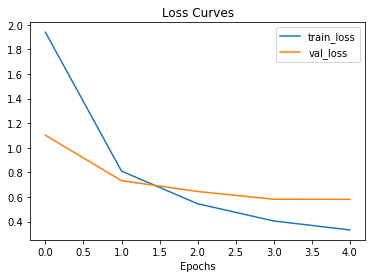

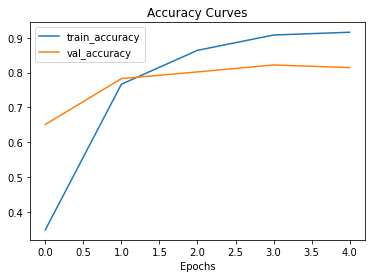

In [ ]:
# check model performance
plot_loss_accuracy(resnet_history)

In [ ]:
# check model summary
resnet_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 2048)             23561152  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23,581,642
Trainable params: 20,490
Non-trainable params: 23,561,152
_________________________________________________________________


### **Model 10 : EfficientNet Model**

In [ ]:
# create model 
efficientnet_model = create_model(efficientnet_url, num_classes=train_data_10_percent.num_classes)

# compile the model
efficientnet_model.compile(loss="categorical_crossentropy",
                     optimizer=Adam(),
                     metrics=['accuracy'])

# fit the model
efficientnet_history = efficientnet_model.fit(train_data_10_percent,
                                  epochs=5,
                                  steps_per_epoch=len(train_data_10_percent),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  callbacks=[create_tensorboard_callback(dir_name='tensorflow_hub',
                                                                         experiment_name='efficientnetB0')])

Saving Tensorboard log files to tensorflow_hub/efficientnetB0/20220628-112616
Epoch 1/5
24/24 [==============================] - 25s 722ms/step - loss: 1.8825 - accuracy: 0.4173 - val_loss: 1.2942 - val_accuracy: 0.7268
Epoch 2/5
24/24 [==============================] - 16s 685ms/step - loss: 1.0654 - accuracy: 0.7707 - val_loss: 0.8642 - val_accuracy: 0.8168
Epoch 3/5
24/24 [==============================] - 15s 649ms/step - loss: 0.7568 - accuracy: 0.8387 - val_loss: 0.6980 - val_accuracy: 0.8448
Epoch 4/5
24/24 [==============================] - 15s 646ms/step - loss: 0.6082 - accuracy: 0.8667 - val_loss: 0.6079 - val_accuracy: 0.8564
Epoch 5/5
24/24 [==============================] - 15s 647ms/step - loss: 0.5164 - accuracy: 0.8853 - val_loss: 0.5590 - val_accuracy: 0.8616


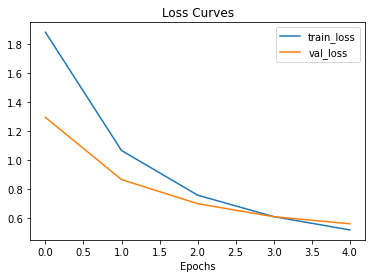

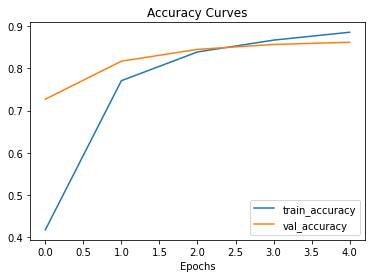

In [ ]:
# check model performance
plot_loss_accuracy(efficientnet_history)

In [ ]:
# check model summary
efficientnet_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1280)             4049564   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,374
Trainable params: 12,810
Non-trainable params: 4,049,564
_________________________________________________________________


### **Model 11 : MobileNet Model**

In [ ]:
# create model 
mobilenet_model = create_model(mobilenet_url, num_classes=train_data_10_percent.num_classes)

# compile the model
mobilenet_model.compile(loss="categorical_crossentropy",
                     optimizer=Adam(),
                     metrics=['accuracy'])

# fit the model
mobilenet_history = mobilenet_model.fit(train_data_10_percent,
                                  epochs=5,
                                  steps_per_epoch=len(train_data_10_percent),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  callbacks=[create_tensorboard_callback(dir_name='tensorflow_hub',
                                                                         experiment_name='mobilenet')])

Saving Tensorboard log files to tensorflow_hub/mobilenet/20220628-112838
Epoch 1/5
24/24 [==============================] - 19s 665ms/step - loss: 1.9647 - accuracy: 0.3493 - val_loss: 1.3326 - val_accuracy: 0.5972
Epoch 2/5
24/24 [==============================] - 15s 633ms/step - loss: 1.0234 - accuracy: 0.7213 - val_loss: 0.9213 - val_accuracy: 0.7316
Epoch 3/5
24/24 [==============================] - 15s 642ms/step - loss: 0.7256 - accuracy: 0.7933 - val_loss: 0.7450 - val_accuracy: 0.7828
Epoch 4/5
24/24 [==============================] - 15s 632ms/step - loss: 0.5699 - accuracy: 0.8427 - val_loss: 0.6874 - val_accuracy: 0.7980
Epoch 5/5
24/24 [==============================] - 15s 628ms/step - loss: 0.4698 - accuracy: 0.8840 - val_loss: 0.6466 - val_accuracy: 0.8008


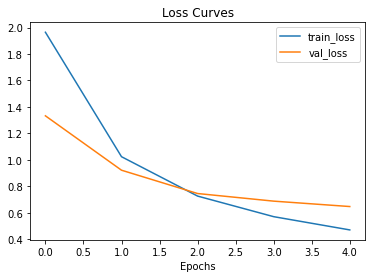

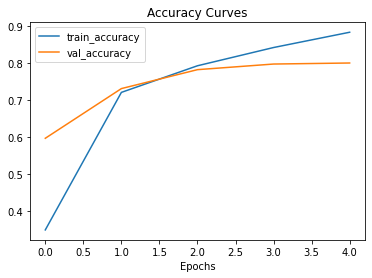

In [ ]:
# check model performance
plot_loss_accuracy(mobilenet_history)

In [ ]:
# check model summary
mobilenet_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1280)             2257984   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 2,270,794
Trainable params: 12,810
Non-trainable params: 2,257,984
_________________________________________________________________


### **Model Comparation Using TensorBoard**

https://tensorboard.dev/experiment/VDd1Djb8QpagmWZjVEQ92Q/

**Upload TensorBoard dev records**

!tensorboard dev upload --logdir ./tensorflow_hub/ \
  --name "EfficientNetB0 vs. ResNet50V2 vs. MobileNetV2" \
  --description "Comparing 3 different TF Hub feature extraction models architectures using 10% of training images" \
  --one_shot

In [ ]:
# Upload TensorBoard dev records
!tensorboard dev upload --logdir ./tensorflow_hub/ \
  --name "EfficientNetB0 vs. ResNet50V2 vs. MobileNetV2" \
  --description "Comparing 3 different TF Hub feature extraction models architectures using 10% of training images" \
  --one_shot

## **Fine Tuning Transfer Learning Model**

1. All experiments will be done using the **EfficientNetB0 model** within the tf.keras.applications module.
2. Each model is constructed by using the **Keras Functional API** and instead of implementing data augmentation in the ImageDataGenerator class.
3. **Smaller dataset**
4. **Data Augmentation**. Using the tf.keras.layers.experimental.preprocessing module and creating a dedicated data augmentation layer.

In [ ]:
# get the functions.py script from github
!wget https://raw.githubusercontent.com/dinachoir/Convolutional-Neural-Network/main/functions.py

# import functions
from functions import unzip_data, walk_through_dir, plot_loss_accuracy, create_tensorboard_callback, compare_historys

--2022-06-30 02:37:34--  https://raw.githubusercontent.com/dinachoir/Convolutional-Neural-Network/main/functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9238 (9.0K) [text/plain]
Saving to: ‘functions.py’

functions.py        100%[===================>]   9.02K  --.-KB/s    in 0s      

2022-06-30 02:37:34 (112 MB/s) - ‘functions.py’ saved [9238/9238]



In [ ]:
# get 10% of the data of the 10 classes
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

# unzip file
unzip_data("10_food_classes_10_percent.zip")

--2022-06-30 02:37:52--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  57.3MB/s    in 2.8s    

2022-06-30 02:37:55 (57.3 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
# Walk through 10 percent data directory and list number of files
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'
There are 10 directories and 0 images in '10_food_classes_10_percent/train'
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'
There are 0 directories and 75 images in '10_food_classes_10_percent/train/stea

In [ ]:
# define training and testing filepaths
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [ ]:
# create input data
import tensorflow as tf

IMAGE_SHAPE = (224, 224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMAGE_SHAPE,
                                                                            label_mode='categorical',
                                                                            batch_size=32)

test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                           image_size=IMAGE_SHAPE,
                                                                           label_mode='categorical')

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data_10_percent

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [ ]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
# See an example batch of data
for images, labels in train_data_10_percent.take(1):
  print(images, labels)

tf.Tensor(
[[[[  6.          13.          31.        ]
   [  6.          13.          29.        ]
   [  6.          13.          29.        ]
   ...
   [121.14776     61.872337    50.857143  ]
   [ 69.688416    29.265055    26.071194  ]
   [ 25.637608     2.469378     1.2397288 ]]

  [[  6.          13.          31.        ]
   [  6.          13.          29.        ]
   [  6.          13.          29.        ]
   ...
   [130.7295      68.03061     54.51537   ]
   [105.19864     58.923237    53.066105  ]
   [ 45.723774    13.795377    11.157559  ]]

  [[  6.          13.          31.        ]
   [  6.          13.          31.        ]
   [  6.          13.          30.663265  ]
   ...
   [131.8571      65.42855     48.52556   ]
   [119.98964     65.50501     55.260147  ]
   [ 81.44324     38.80052     31.081125  ]]

  ...

  [[150.34186    110.91333     46.127598  ]
   [150.87248    109.87249     43.87249   ]
   [139.56613     98.73451     33.591652  ]
   ...
   [ 64.525566    42.739

### **Model 12 : EfficientNetB0 Model Using Keras Functional API**

The kind of transfer learning is **feature extraction transfer learning**, similar to what I did with the TensorFlow Hub model (Model 10), except here use the Keras Functional API to build the model rather than the Sequential API.

In [ ]:
# create base model with tf.keras.applications
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# freeze the base model, so the prelearned patterns remain
base_model.trainable=False

# create input into the model
inputs = tf.keras.layers.Input(shape=(224,224,3), name="input_layer")

# pass the inputs to the base model
x = base_model(inputs)
print(f"Data shape after passing to base_model: {x.shape}")

# average pool the outputs of the base model (to aggregate the most important informations)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"Data shape after GlobalAveragePooling2D: {x.shape}")

# create the output activation layer
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

# combine the inputs and the outputs into a model
model_12 = tf.keras.Model(inputs, outputs)

# compile the model
model_12.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# fit the model
history_10_percent = model_12.fit(train_data_10_percent,
                                  epochs=5,
                                  steps_per_epoch=len(train_data_10_percent),
                                  validation_data=test_data_10_percent,
                                  validation_steps=int(0.25 * len(test_data_10_percent)), # less validation data so epochs run faster
                                  callbacks=[create_tensorboard_callback("transfer_learning",
                                                                         "10_percent_feature_extract")])

16719872/16705208 [==============================] - 0s 0us/step
Data shape after passing to base_model: (None, 7, 7, 1280)
Data shape after GlobalAveragePooling2D: (None, 1280)
Saving Tensorboard log files to transfer_learning/10_percent_feature_extract/20220629-092143
Epoch 1/5
24/24 [==============================] - 23s 226ms/step - loss: 1.8503 - accuracy: 0.4213 - val_loss: 1.3187 - val_accuracy: 0.7237
Epoch 2/5
24/24 [==============================] - 5s 185ms/step - loss: 1.1198 - accuracy: 0.7653 - val_loss: 0.9429 - val_accuracy: 0.7796
Epoch 3/5
24/24 [==============================] - 4s 148ms/step - loss: 0.8206 - accuracy: 0.8160 - val_loss: 0.7676 - val_accuracy: 0.8010
Epoch 4/5
24/24 [==============================] - 5s 183ms/step - loss: 0.6752 - accuracy: 0.8427 - val_loss: 0.6827 - val_accuracy: 0.8224
Epoch 5/5
24/24 [==============================] - 4s 148ms/step - loss: 0.5857 - accuracy: 0.8640 - val_loss: 0.6266 - val_accuracy: 0.8355


In [ ]:
# check the architecture of the base model
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

In [ ]:
# check the summary of the model constructed with functional API (model_12)
model_12.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


To make the output of the model compatible with the input shape, **GlobalAveragePooling2D layer** condensed the input tensor from shape (None, 224, 224, 3) to (None, 10). It basically condensed the information found by the model into a lower dimension feature vector.

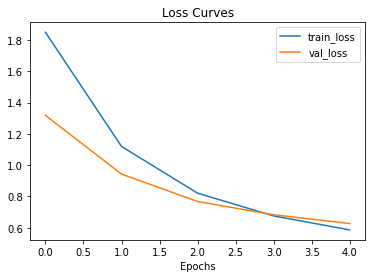

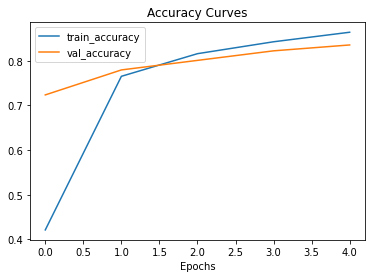

In [ ]:
# check performance of the model
plot_loss_accuracy(history_10_percent)

### **Model 13 : Feature Extraction Transfer Learning Model on 1% of the training data with data augmentation**

In [ ]:
# get the data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

# define training and testing filepaths
train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"

--2022-06-30 02:38:36--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  72.3MB/s    in 1.8s    

2022-06-30 02:38:38 (72.3 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
# walk through the directory
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'
There are 10 directories and 0 images in '10_food_classes_1_percent/train'
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'
There are 10 direct

In [ ]:
# load the files
import tensorflow as tf

IMAGE_SHAPE = (224,224)

train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           image_size=IMAGE_SHAPE,
                                                                           batch_size=32,
                                                                           label_mode='categorical')

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                image_size=IMAGE_SHAPE,
                                                                label_mode="categorical")

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


#### **Adding Data Augmentation Layer**

The purpose of applying augmentation to images data is to make training dataset more vary, because the real-life images are not going to be perfect (e.g. orientated in strange way). By augmenting data, the model will be able to generalize patterns in images.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

data_augmentation = keras.Sequential([
                      preprocessing.RandomFlip("horizontal"),
                      preprocessing.RandomRotation(0.2),
                      preprocessing.RandomZoom(0.2),
                      preprocessing.RandomHeight(0.2),
                      preprocessing.RandomWidth(0.2)
], name="data_augmentation")

(-0.5, 511.5, 381.5, -0.5)

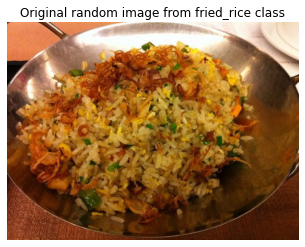

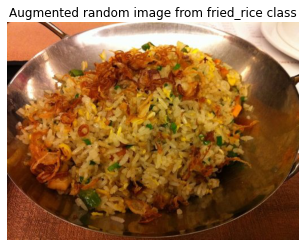

In [ ]:
# test the data augmentation layer with random image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

# get a random image
target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir +"/"+ random_image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Original random image from {target_class} class")
plt.axis(False);

# augmented image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0))
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.)
plt.title(f"Augmented random image from {target_class} class")
plt.axis(False)

#### **Modeling**

In [ ]:
# setting up the base model and the input shape
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape, name="input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False) # pass augmented inputs to the base model without training it
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x) # pooling output features
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

# create the model with inputs and outputs
model_13 = keras.Model(inputs, outputs)

# compile the model
model_13.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# fit the model
history_1_percent_data_aug = model_13.fit(train_data_1_percent,
                                 epochs=5,
                                 steps_per_epoch=len(train_data_1_percent),
                                 validation_data=test_data,
                                 validation_steps=int(0.25*len(test_data)),
                                 callbacks=[create_tensorboard_callback("transfer_learning",
                                                                        "1_percent_data_aug")])

Saving Tensorboard log files to transfer_learning/1_percent_data_aug/20220629-092522
Epoch 1/5
3/3 [==============================] - 12s 2s/step - loss: 2.3152 - accuracy: 0.1143 - val_loss: 2.1957 - val_accuracy: 0.2072
Epoch 2/5
3/3 [==============================] - 3s 1s/step - loss: 2.1120 - accuracy: 0.2286 - val_loss: 2.0962 - val_accuracy: 0.2780
Epoch 3/5
3/3 [==============================] - 4s 2s/step - loss: 1.8367 - accuracy: 0.5429 - val_loss: 1.9744 - val_accuracy: 0.3947
Epoch 4/5
3/3 [==============================] - 4s 2s/step - loss: 1.7521 - accuracy: 0.5429 - val_loss: 1.8943 - val_accuracy: 0.4408
Epoch 5/5
3/3 [==============================] - 4s 2s/step - loss: 1.6172 - accuracy: 0.6857 - val_loss: 1.7999 - val_accuracy: 0.4967


In [ ]:
# evaluate model on the test data
eval_1_percent_data_aug = model_13.evaluate(test_data)
eval_1_percent_data_aug

79/79 [==============================] - 6s 75ms/step - loss: 1.8115 - accuracy: 0.4892


[1.8115078210830688, 0.48919999599456787]

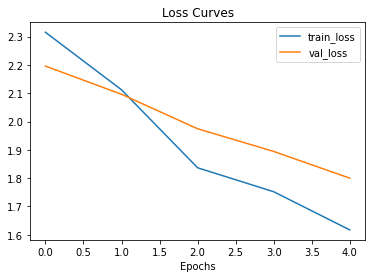

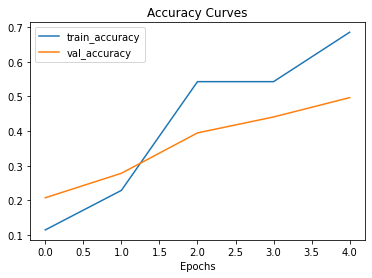

In [ ]:
# check model performance
plot_loss_accuracy(history_1_percent_data_aug)

### **Model 14 : Feature Extraction Transfer Learning Model on 10% of the training data with data augmentation**

In [ ]:
# get 10% of the data of 10 food classes
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data("10_food_classes_10_percent.zip")

# define training and testing filepath
train_dir_10_percent = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

--2022-06-29 09:26:06--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 172.253.118.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M   177MB/s    in 0.9s    

2022-06-29 09:26:07 (177 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [ ]:
# load the files
import tensorflow as tf

IMAGE_SHAPE = (224,224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                           image_size=IMAGE_SHAPE,
                                                                           batch_size=32, # it is a default value
                                                                           label_mode='categorical')

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                image_size=IMAGE_SHAPE,
                                                                label_mode="categorical")

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


#### **Creating ModelCheckPoint Callback**

In [ ]:
# set up checkpoint path
checkpoint_path = "10_percent_model_checkpoint_weights/checkpoint.ckpt"

# create checkpoint callback that ssaves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False, # to save only the best model
                                                         save_freq="epoch", # to save every epoch
                                                         verbose=1)

In [ ]:
# create data augmentation layer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

data_augmentation = keras.Sequential([
                      preprocessing.RandomFlip("horizontal"),
                      preprocessing.RandomRotation(0.2),
                      preprocessing.RandomZoom(0.2),
                      preprocessing.RandomHeight(0.2),
                      preprocessing.RandomWidth(0.2)
], name="data_augmentation")

In [ ]:
# setting up the base model and the input shape
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape, name="input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False) # pass augmented inputs to the base model without training it
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x) # pooling output features
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

# create the model with inputs and outputs
model_14 = keras.Model(inputs, outputs)

# compile the model
model_14.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # learning rate default value
                 metrics=["accuracy"])

# fit the model
initial_epochs=5
history_10_percent_data_aug = model_14.fit(train_data_10_percent,
                                 epochs=initial_epochs,
                                 steps_per_epoch=len(train_data_10_percent),
                                 validation_data=test_data,
                                 validation_steps=int(0.25*len(test_data)),
                                 callbacks=[create_tensorboard_callback("transfer_learning",
                                                                        "10_percent_data_aug"),
                                            checkpoint_callback])

Saving Tensorboard log files to transfer_learning/10_percent_data_aug/20220629-092856
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0055 - accuracy: 0.3227
Epoch 1: saving model to 10_percent_model_checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 21s 630ms/step - loss: 2.0055 - accuracy: 0.3227 - val_loss: 1.4633 - val_accuracy: 0.6579
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3667 - accuracy: 0.6680
Epoch 2: saving model to 10_percent_model_checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 10s 420ms/step - loss: 1.3667 - accuracy: 0.6680 - val_loss: 1.0467 - val_accuracy: 0.7664
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0726 - accuracy: 0.7360
Epoch 3: saving model to 10_percent_model_checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 10s 391ms/step - loss: 1.0726 - accuracy: 0.7360 - val_loss: 0.8473 - val_accuracy: 0.7928
Epoch 4/

In [ ]:
# evaluate model on the test data
eval_10_percent_data_aug = model_14.evaluate(test_data)
eval_10_percent_data_aug

79/79 [==============================] - 6s 70ms/step - loss: 0.6982 - accuracy: 0.8116


[0.6981664299964905, 0.8116000294685364]

In [ ]:
# load saved model's weight and evaluate it
model_14.load_weights(checkpoint_path)
loaded_weights_model_eval = model_14.evaluate(test_data)

79/79 [==============================] - 6s 70ms/step - loss: 0.6982 - accuracy: 0.8116


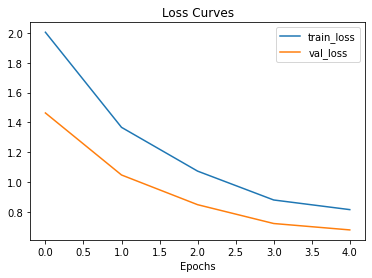

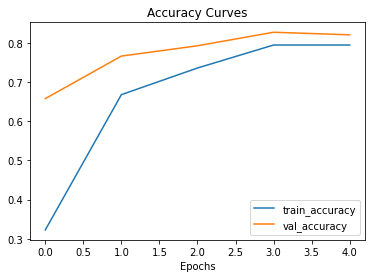

In [ ]:
# check model performance
plot_loss_accuracy(history_10_percent_data_aug)

Model's performance with 10% of the data and data augmentation (model_14) is slightly worse than the model with 10% of the data without data augmentation (model_12). However the curves trends in the same direction (convergent), meaning the metrics would likely become better with some improvement.

### **Model 15 : Fine Tuning Transfer Learning Model on 10% of the training data with data augmentation**

Using the same base model (EfficientNetB0), except I'll be unfreezing some of its layers (ones closest to the top) and running the model for a few more epochs.

In [ ]:
# check out layers in model_14
model_14.layers

In [ ]:
# find out which layer is not trainable
for layer in model_14.layers:
  print(layer.trainable)

True
True
False
True
True


In [ ]:
# check every layer in base model (efficientnetB0 layer)
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_4 False
1 rescaling_3 False
2 normalization_3 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

A functional layer (EfficientNetB0) is not trainable because all of the layers in it are frozen. To fine-tune  model_14, I'm going to unfreeze the top 10 layers. This means all of the base model's layers except for the last 10 will remain frozen and untrainable.

In [ ]:
# unfreeze all layers
base_model.trainable = True

# freeze all layers except for the top 10
for layer in base_model.layers[:-10]:
  layer.trainable = False

# re-compile model_14 
model_14.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # 10x smaller than default learning rate value
                 metrics=["accuracy"])

Using a 10x lower learning rate to ensure the updates to the previous trained weights aren't too large. So the model doesn't try to overwrite the existing weights in the pretrained model too fast. In other words, we want learning to be more gradual.

In [ ]:
# re-check all layers in base model after unfreeze the top 10 layers
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_4 False
1 rescaling_3 False
2 normalization_3 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [ ]:
# fine tune for another 5 epochs
fine_tune_epochs = initial_epochs + 5

# re-fit the model (model_14 with 10 trainable layers)
history_fine_tune_10_percent_data_aug = model_14.fit(train_data_10_percent,
                                               epochs=fine_tune_epochs,
                                               validation_data=test_data,
                                               initial_epoch=history_10_percent_data_aug.epoch[-1], # start from previous last epoch
                                               validation_steps=int(0.25 * len(test_data)),
                                               callbacks=[create_tensorboard_callback("transfer_learning",
                                                                                      "10_percent_fine_tune_last_10_data_aug")])

Saving Tensorboard log files to transfer_learning/10_percent_fine_tune_last_10_data_aug/20220629-093410
Epoch 5/10
24/24 [==============================] - 16s 389ms/step - loss: 0.6978 - accuracy: 0.8093 - val_loss: 0.5605 - val_accuracy: 0.8207
Epoch 6/10
24/24 [==============================] - 9s 338ms/step - loss: 0.5722 - accuracy: 0.8213 - val_loss: 0.5064 - val_accuracy: 0.8421
Epoch 7/10
24/24 [==============================] - 8s 320ms/step - loss: 0.4786 - accuracy: 0.8573 - val_loss: 0.4912 - val_accuracy: 0.8372
Epoch 8/10
24/24 [==============================] - 9s 372ms/step - loss: 0.4515 - accuracy: 0.8653 - val_loss: 0.5011 - val_accuracy: 0.8388
Epoch 9/10
24/24 [==============================] - 9s 344ms/step - loss: 0.4042 - accuracy: 0.8787 - val_loss: 0.4151 - val_accuracy: 0.8734
Epoch 10/10
24/24 [==============================] - 9s 363ms/step - loss: 0.3857 - accuracy: 0.8813 - val_loss: 0.4574 - val_accuracy: 0.8553


In [ ]:
# evaluate model on the test data
eval_fine_tune_10_percent_data_aug = model_14.evaluate(test_data)
eval_fine_tune_10_percent_data_aug

79/79 [==============================] - 6s 70ms/step - loss: 0.4802 - accuracy: 0.8432


[0.48024487495422363, 0.8432000279426575]

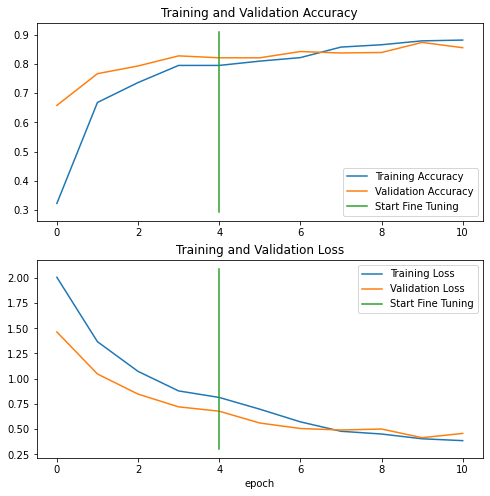

In [ ]:
# check model performance and compare model_14 before and after fine-tuning
compare_historys(original_history=history_10_percent_data_aug,
                 new_history=history_fine_tune_10_percent_data_aug,
                 initial_epochs=5)

The model's performance (model_14) improved after fine tuning the top 10 layers in the base model even though the model only trained with 10% of the data. Fine tuning will work better in a larger amounts of data, so the next experiment i'll be using 100% of the training data.

### **Model 16 : Fine Tuning Transfer Learning Model on 100% of the training data with data augmentation**

Reload model_14 (from section Model 14), then fine-tune model with 100% of the data.

In [ ]:
# get 100% of data of 10 food classes
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 
unzip_data("10_food_classes_all_data.zip")

# define the filepaths
train_dir_100_percent = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

--2022-06-30 02:39:25--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 74.125.200.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  49.6MB/s    in 11s     

2022-06-30 02:39:37 (45.0 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
# check out the directories
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'
There are 10 directories and 0 images in '10_food_classes_all_data/train'
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'
There are 1

In [ ]:
# load the files
import tensorflow as tf

IMAGE_SHAPE = (224,224)
train_data_100_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_100_percent,
                                                                           image_size=IMAGE_SHAPE,
                                                                           batch_size=32, # it is a default value
                                                                           label_mode='categorical')

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                image_size=IMAGE_SHAPE,
                                                                label_mode="categorical")

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


**Revert model_14 (from section Model 14) to the saved weights**

model_14 before fine tuning

In [ ]:
# load model from checkpoint
model_14.load_weights(checkpoint_path)

In [ ]:
# compare loaded model evaluation and the original model evaluation (the result must be the same)
model_14.evaluate(test_data)

79/79 [==============================] - 6s 71ms/step - loss: 0.6982 - accuracy: 0.8116


[0.6981664299964905, 0.8116000294685364]

In [ ]:
eval_10_percent_data_aug

[0.6981664299964905, 0.8116000294685364]

**Fine Tuning the last 10 layers of the base model with 100% of the data for another 5 epochs**

In [ ]:
# check the trainable layer in base model
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_4 False
1 rescaling_3 False
2 normalization_3 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [ ]:
# re-compile model_14
model_14.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                 metrics=["accuracy"])

# fine tune for another 5 epochs
fine_tune_epochs = initial_epochs + 5

# re-fit the model (model_14 with 10 trainable layers)
history_fine_tune_100_percent_data_aug = model_14.fit(train_data_100_percent,
                                               epochs=fine_tune_epochs,
                                               validation_data=test_data,
                                               initial_epoch=history_10_percent_data_aug.epoch[-1], # start from previous last epoch
                                               validation_steps=int(0.25 * len(test_data)),
                                               callbacks=[create_tensorboard_callback("transfer_learning",
                                                                                      "100_percent_fine_tune_last_10_data_aug")])

Saving Tensorboard log files to transfer_learning/100_percent_fine_tune_last_10_data_aug/20220629-093656
Epoch 5/10
235/235 [==============================] - 60s 226ms/step - loss: 0.7303 - accuracy: 0.7639 - val_loss: 0.4263 - val_accuracy: 0.8569
Epoch 6/10
235/235 [==============================] - 47s 197ms/step - loss: 0.5819 - accuracy: 0.8124 - val_loss: 0.4079 - val_accuracy: 0.8487
Epoch 7/10
235/235 [==============================] - 44s 183ms/step - loss: 0.5190 - accuracy: 0.8316 - val_loss: 0.3725 - val_accuracy: 0.8750
Epoch 8/10
235/235 [==============================] - 40s 169ms/step - loss: 0.4668 - accuracy: 0.8473 - val_loss: 0.3947 - val_accuracy: 0.8618
Epoch 9/10
235/235 [==============================] - 39s 165ms/step - loss: 0.4377 - accuracy: 0.8616 - val_loss: 0.3479 - val_accuracy: 0.8783
Epoch 10/10
235/235 [==============================] - 37s 155ms/step - loss: 0.4130 - accuracy: 0.8655 - val_loss: 0.3287 - val_accuracy: 0.8882


In [ ]:
# evaluate model on the test data
eval_fine_tune_100_percent_data_aug = model_14.evaluate(test_data)
eval_fine_tune_100_percent_data_aug

79/79 [==============================] - 6s 72ms/step - loss: 0.3148 - accuracy: 0.8996


[0.31484150886535645, 0.8996000289916992]

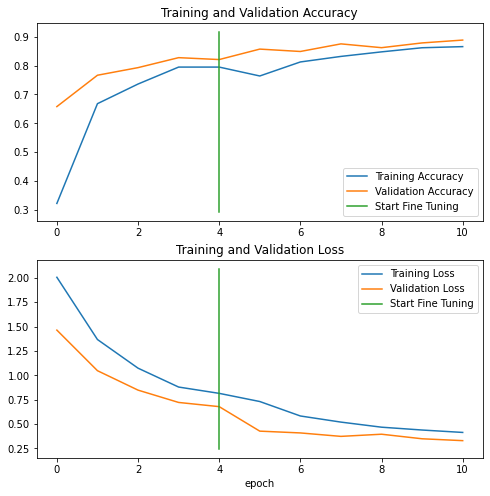

In [ ]:
# check model performance and compare model_14 before and after fine-tuning with 100% data
compare_historys(original_history=history_10_percent_data_aug,
                 new_history=history_fine_tune_100_percent_data_aug,
                 initial_epochs=5)

The model's performance (model_14) improves by training model in a larger dataset. This model possibly will improve more if trained for longer epochs.

### **Model Comparation Using TensorBoard**

https://tensorboard.dev/experiment/sZJIrXqWRIWdkKCbllyWZA/

**Upload TensorBoard dev records**

!tensorboard dev upload --logdir ./transfer_learning \
  --name "Transfer Learning Experiments" \
  --description "A series of different transfer learning experiments with varying amounts of data and fine-tuning" \
  --one_shot

In [ ]:
!tensorboard dev upload --logdir ./transfer_learning \
  --name "Transfer Learning Experiments" \
  --description "A series of different transfer learning experiments with varying amounts of data and fine-tuning" \
  --one_shot


New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/sZJIrXqWRIWdkKCbllyWZA/

[2022-06-29T09:45:32] Started scanning logdir.
[2022-06-29T09:45:43] Total uploaded: 168 scalars, 0 tensors, 6 binary objects (4.9 MB)
[2022-06-29T09:45:43] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/sZJIrXqWRIWdkKCbllyWZA/


## **101 Food Vision Model**

1. Preparing 10% of the Food101 data (10% of training data)
2. Training a feature extraction transfer learning model on 10% of the Food101 training data
3. Fine-tuning our feature extraction model
4. Saving and loaded our trained model
5. Evaluating the performance of our Food Vision model trained on 10% of the training data
  - Finding our model's most wrong predictions
6. Making predictions with our Food Vision model on custom images of food

### **Data Preparation**

Preparing 10% of the Food101 data (10% of training data)

In [ ]:
# import functions
!wget https://raw.githubusercontent.com/dinachoir/Convolutional-Neural-Network/main/functions.py
from functions import unzip_data, walk_through_dir, plot_loss_accuracy, compare_historys, create_confusion_matrix, load_prep_image

--2022-06-30 07:37:00--  https://raw.githubusercontent.com/dinachoir/Convolutional-Neural-Network/main/functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9238 (9.0K) [text/plain]
Saving to: ‘functions.py’

functions.py        100%[===================>]   9.02K  --.-KB/s    in 0s      

2022-06-30 07:37:00 (84.6 MB/s) - ‘functions.py’ saved [9238/9238]



In [ ]:
# get the data (10% of the Food101 data)
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip

unzip_data("101_food_classes_10_percent.zip")

# define training and testing filepaths
train_dir = "101_food_classes_10_percent/train/"
test_dir = "101_food_classes_10_percent/test/"

--2022-06-30 07:38:00--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.128, 173.194.203.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip.1’

101_food_classes_10 100%[===================>]   1.51G   260MB/s    in 6.0s    

2022-06-30 07:38:06 (259 MB/s) - ‘101_food_classes_10_percent.zip.1’ saved [1625420029/1625420029]



In [ ]:
# check out the directory
walk_through_dir("101_food_classes_10_percent")

There are 2 directories and 0 images in '101_food_classes_10_percent'
There are 101 directories and 0 images in '101_food_classes_10_percent/train'
There are 0 directories and 75 images in '101_food_classes_10_percent/train/waffles'
There are 0 directories and 75 images in '101_food_classes_10_percent/train/hummus'
There are 0 directories and 75 images in '101_food_classes_10_percent/train/eggs_benedict'
There are 0 directories and 75 images in '101_food_classes_10_percent/train/caprese_salad'
There are 0 directories and 75 images in '101_food_classes_10_percent/train/churros'
There are 0 directories and 75 images in '101_food_classes_10_percent/train/macaroni_and_cheese'
There are 0 directories and 75 images in '101_food_classes_10_percent/train/spaghetti_bolognese'
There are 0 directories and 75 images in '101_food_classes_10_percent/train/hot_dog'
There are 0 directories and 75 images in '101_food_classes_10_percent/train/french_onion_soup'
There are 0 directories and 75 images in '

In [ ]:
# set up the input data
import tensorflow as tf

IMAGE_SHAPE = (224,224)
train_data_101_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                label_mode="categorical",
                                                                                image_size=IMAGE_SHAPE,
                                                                                batch_size=32)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMAGE_SHAPE,
                                                                shuffle=False)

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


### **Training Model**

Training a feature extraction transfer learning model on 10% of the Food101 training data.

**Modeling Setup:**

1. A **ModelCheckpoint callback** to save the progress during training. So, if model improvement experiment doesn't work well or add any benefit, I can revert back to the previous model without having to train from scratch every time.
2. **Data augmentation** built right into the model
3. A headless (no top layers) **EfficientNetB0** architecture from tf.keras.applications as the base model
4. A Dense layer with 101 hidden neurons (same as number of food classes) and **softmax activation** as the output layer
5. **Categorical crossentropy** as the loss function since there are 101 classes
6. The **Adam optimizer** with the default settings
7. Fitting for 5 full passes on the training data while evaluating on 15% of the test data

**Creating Checkpoint Callback**

In [ ]:
checkpoint_path = "101_classes_10_percent_data_model_checkpoint"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=True,
                                                         monitor="val_accuracy")

**Creating Data Augmentation Model with The Sequential API**

This model will be inserted as layer in Functional API Model.

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

data_augmentation = Sequential([
                          preprocessing.RandomFlip("horizontal"),
                          preprocessing.RandomRotation(0.2),
                          preprocessing.RandomHeight(0.2),
                          preprocessing.RandomWidth(0.2),
                          preprocessing.RandomZoom(0.2)
], name="data_augmentation")

**Creating a Feature Extraction Transfer Learning Model**

**Modeling Setup:**
1. Modeling using Keras Functional API
2. Using tf.keras.applications.EfficientNetB0 as the base model 
3. Using include_top=False parameter to add customized output layers
4. Using GlobalAveragePooling2D layer to condense the outputs of the base model into a shape that compatible in the output layer (Dense layer).

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable =False

# setup model architecture with trainable top layers
inputs = layers.Input(shape=(224,224,3), name="Input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling")(x)
outputs = layers.Dense(len(train_data_101_10_percent.class_names), activation="softmax", name="output_layer")(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
# inspect model architecture
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling (Glo  (None, 1280)             0         
 balAveragePooling2D)                                            
                                                                 
 output_layer (Dense)        (None, 101)               129381    
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-train

In [ ]:
# compile the model
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# fit the model
initial_epochs = 5
history_101_classes_10_percent = model.fit(train_data_101_10_percent,
                                           epochs=initial_epochs,
                                           validation_data=test_data,
                                           validation_steps=int(0.15*len(test_data)),
                                           callbacks=[checkpoint_callback])

Epoch 1/5
237/237 [==============================] - 95s 325ms/step - loss: 3.4582 - accuracy: 0.2565 - val_loss: 2.7780 - val_accuracy: 0.3506
Epoch 2/5
237/237 [==============================] - 60s 251ms/step - loss: 2.3519 - accuracy: 0.4639 - val_loss: 2.2960 - val_accuracy: 0.4386
Epoch 3/5
237/237 [==============================] - 55s 228ms/step - loss: 1.9834 - accuracy: 0.5257 - val_loss: 2.1392 - val_accuracy: 0.4642
Epoch 4/5
237/237 [==============================] - 50s 212ms/step - loss: 1.7523 - accuracy: 0.5820 - val_loss: 2.0496 - val_accuracy: 0.4793
Epoch 5/5
237/237 [==============================] - 48s 200ms/step - loss: 1.5914 - accuracy: 0.6091 - val_loss: 2.0442 - val_accuracy: 0.4746


In [ ]:
# evaluate model on all test data
eval_feature_extraction_model = model.evaluate(test_data)
eval_feature_extraction_model

790/790 [==============================] - 57s 73ms/step - loss: 1.7207 - accuracy: 0.5537


[1.7207038402557373, 0.5537029504776001]

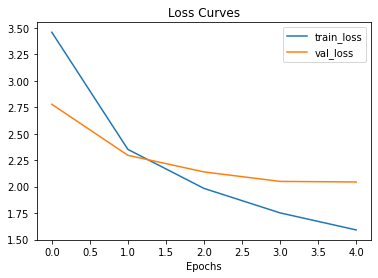

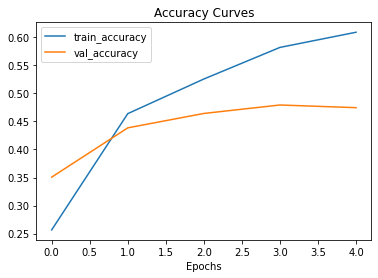

In [ ]:
# check model performance
plot_loss_accuracy(history_101_classes_10_percent)

### **Fine Tuning Model**

Fine-tuning the feature extraction model to improve model performance.

In [ ]:
# unfreeze all layers in the base model (EfficientNetB0)
base_model.trainable = True

# re-freeze layers except for the last 5
for layer in base_model.layers[:-10]:
  layer.trainable = False

In [ ]:
# re-check the trainable layers in the base model
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_4 False
1 rescaling_3 False
2 normalization_3 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [ ]:
# re-compile the model
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["accuracy"])

# fine tune for 5 more epochs
fine_tune_epochs = initial_epochs + 5

# re-fit the model
history_fine_tune_101_classes_10_percent = model.fit(train_data_101_10_percent,
                                           epochs=fine_tune_epochs,
                                           validation_data=test_data,
                                           validation_steps=int(0.15*len(test_data)),
                                           initial_epoch=history_101_classes_10_percent.epoch[-1])

Epoch 5/10
237/237 [==============================] - 55s 203ms/step - loss: 1.3333 - accuracy: 0.6514 - val_loss: 1.9209 - val_accuracy: 0.5061
Epoch 6/10
237/237 [==============================] - 44s 183ms/step - loss: 1.1866 - accuracy: 0.6845 - val_loss: 1.9260 - val_accuracy: 0.5058
Epoch 7/10
237/237 [==============================] - 40s 169ms/step - loss: 1.0949 - accuracy: 0.7122 - val_loss: 1.9423 - val_accuracy: 0.5064
Epoch 8/10
237/237 [==============================] - 41s 171ms/step - loss: 1.0141 - accuracy: 0.7267 - val_loss: 1.9109 - val_accuracy: 0.5119
Epoch 9/10
237/237 [==============================] - 40s 169ms/step - loss: 0.9347 - accuracy: 0.7481 - val_loss: 1.9174 - val_accuracy: 0.5103
Epoch 10/10
237/237 [==============================] - 38s 161ms/step - loss: 0.8777 - accuracy: 0.7641 - val_loss: 1.9431 - val_accuracy: 0.5117


Using a 10x lower learning rate to ensure the updates to the previous trained weights aren't too large.

In [ ]:
# evaluate fine-tuned model on all test data
eval_fine_tuned_model = model.evaluate(test_data)
eval_fine_tuned_model

790/790 [==============================] - 58s 74ms/step - loss: 1.6450 - accuracy: 0.5784


[1.6449936628341675, 0.5784158706665039]

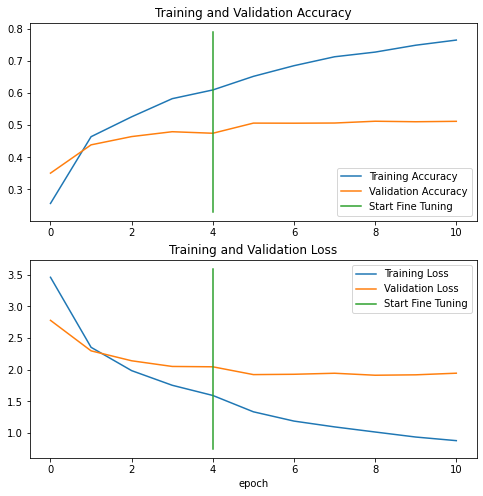

In [ ]:
compare_historys(original_history=history_101_classes_10_percent,
                 new_history=history_fine_tune_101_classes_10_percent,
                 initial_epochs=5)

### **Training Model with More Epoch**

Train a feature-extraction transfer learning model for 10 epochs on the same data and compare its performance versus a model which used feature extraction for 5 epochs and fine-tuning for 5 epochs.

**Creating EarlyStopping Callback**

In [ ]:
from keras.callbacks import EarlyStopping
earlystopping_callback = EarlyStopping(monitor='val_accuracy', 
                                       mode='max', 
                                       verbose=1, 
                                       patience=5)

**Creating a Feature Extraction Transfer Learning Model**

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable =False

# setup model architecture with trainable top layers
inputs = layers.Input(shape=(224,224,3), name="Input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling")(x)
outputs = layers.Dense(len(train_data_101_10_percent.class_names), activation="softmax", name="output_layer")(x)
model_1 = tf.keras.Model(inputs, outputs)

In [ ]:
# compile the model
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# fit the model
initial_epochs = 10
history_101_classes_10_percent_epoch_10 = model_1.fit(train_data_101_10_percent,
                                           epochs=initial_epochs,
                                           validation_data=test_data,
                                           validation_steps=int(0.15*len(test_data)),
                                           callbacks=[earlystopping_callback])

Epoch 1/10
237/237 [==============================] - 45s 164ms/step - loss: 3.4632 - accuracy: 0.2490 - val_loss: 2.7646 - val_accuracy: 0.3610
Epoch 2/10
237/237 [==============================] - 37s 155ms/step - loss: 2.3437 - accuracy: 0.4636 - val_loss: 2.2968 - val_accuracy: 0.4409
Epoch 3/10
237/237 [==============================] - 34s 140ms/step - loss: 1.9773 - accuracy: 0.5316 - val_loss: 2.1248 - val_accuracy: 0.4680
Epoch 4/10
237/237 [==============================] - 35s 148ms/step - loss: 1.7536 - accuracy: 0.5781 - val_loss: 2.0388 - val_accuracy: 0.4804
Epoch 5/10
237/237 [==============================] - 34s 143ms/step - loss: 1.6068 - accuracy: 0.6057 - val_loss: 2.0002 - val_accuracy: 0.4857
Epoch 6/10
237/237 [==============================] - 35s 144ms/step - loss: 1.4730 - accuracy: 0.6379 - val_loss: 1.9216 - val_accuracy: 0.4960
Epoch 7/10
237/237 [==============================] - 33s 138ms/step - loss: 1.3689 - accuracy: 0.6634 - val_loss: 1.9237 - val_ac

In [ ]:
# evaluate model on all test data
eval_feature_extraction_model_1 = model_1.evaluate(test_data)
eval_feature_extraction_model_1

790/790 [==============================] - 57s 72ms/step - loss: 1.6438 - accuracy: 0.5646


[1.6438261270523071, 0.5646336674690247]

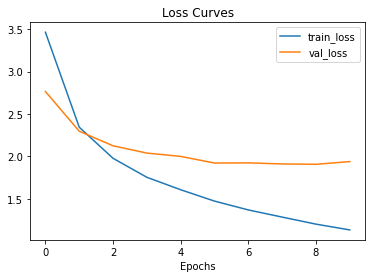

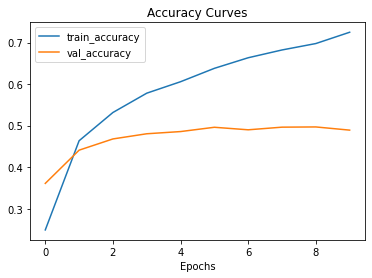

In [ ]:
plot_loss_accuracy(history_101_classes_10_percent_epoch_10)

### **Save the Model**

In [ ]:
# save model
model.save("drive/My Drive/tensorflow/101_food_class_10_percent_saved_model")

INFO:tensorflow:Assets written to: drive/My Drive/Tensorflow/101_food_class_10_percent_saved_model/assets


INFO:tensorflow:Assets written to: drive/My Drive/Tensorflow/101_food_class_10_percent_saved_model/assets


In [ ]:
model.save("101_food_10%_model.h5")

In [ ]:
# save model
model_1.save("drive/My Drive/Tensorflow/101_food_class_10_percent_saved_model_1")

INFO:tensorflow:Assets written to: drive/My Drive/tensorflow/101_food_class_10_percent_saved_model_1/assets


INFO:tensorflow:Assets written to: drive/My Drive/tensorflow/101_food_class_10_percent_saved_model_1/assets


In [ ]:
model_1.save("101_food_10%_model_1.h5")

### **Prediction**

In [ ]:
# prediction probability
pred_probs = model.predict(test_data, verbose=1)

790/790 [==============================] - 73s 88ms/step


In [ ]:
# prediction probability tensor shape
pred_probs.shape

(25250, 101)

Every sample has 101 prediction probability for 101 classes. The highest prediction probability will be the predicted class of the sample.

In [ ]:
# get the class prediction of each sample
pred_classes = pred_probs.argmax(axis=1)

# take a look for the first 10 class predictions
pred_classes[:10]

array([ 0,  0,  0,  8,  8, 78, 29,  0,  9,  0])

In [ ]:
# compare to the actual class

y_labels = [] # list for the actual class from test_data
for images, labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax())

# take a look for the first 10 actual class
y_labels[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Since test_data isn't shuffled (shuffle=False), y_labels array comes in the same order as the pred_classes array. It seems that image number 4, 5, 6, 7, 9 got the wrong class prediction.

**Visualizing Prediction**

In [ ]:
# get the class names
class_names = test_data.class_names

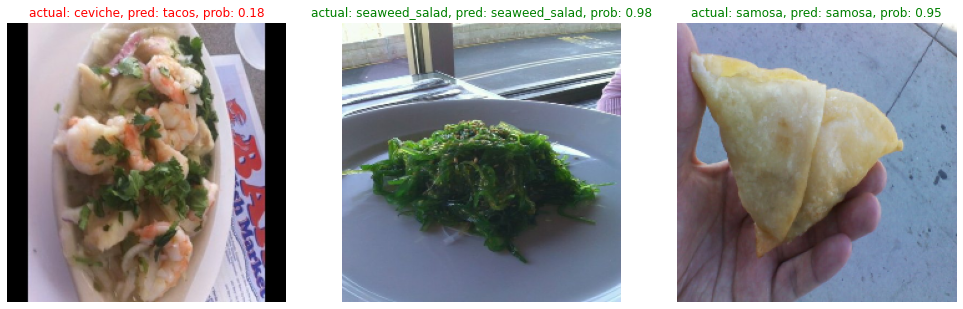

In [ ]:
# make prediction on a series of random images
import os
import random

plt.figure(figsize=(17, 10))
for i in range(3):
  # Choose a random image from a random class 
  class_name = random.choice(class_names)
  filename = random.choice(os.listdir(test_dir + "/" + class_name))
  filepath = test_dir + class_name + "/" + filename

  # Load the image and make predictions
  img = load_prep_image(filepath, scale=False) # EfficientNet has already scaled the image
  pred_prob = model.predict(tf.expand_dims(img, axis=0)) # model accepts tensors of shape [None, 224, 224, 3]
  pred_class = class_names[pred_prob.argmax()] # find the predicted class 

  # Plot the image(s)
  plt.subplot(1, 3, i+1)
  plt.imshow(img/255.)
  if class_name == pred_class: # Change the color of text based on whether prediction is right or wrong
    title_color = "g"
  else:
    title_color = "r"
  plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c=title_color)
  plt.axis(False);

**The Most Wrong Predictions**

1. Get all of the image file paths in the test dataset using the list_files() method.
2. Create a pandas DataFrame of the image filepaths, actual labels, prediction classes, max prediction probabilities, actual class names and predicted class names.
3. Use the DataFrame to find all the wrong predictions (where the actual doesn't match the prediction).
4. Sort the DataFrame based on wrong predictions and highest max prediction probabilities.
5. Visualize the images with the highest prediction probabilities but have the wrong prediction.

In [ ]:
# get the filenames of all test data
filepaths = []
for filepath in test_data.list_files("101_food_classes_10_percent/test/*/*.jpg", shuffle=False):
  filepaths.append(filepath.numpy())

filepaths[:5]

[b'101_food_classes_10_percent/test/apple_pie/1011328.jpg',
 b'101_food_classes_10_percent/test/apple_pie/101251.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1034399.jpg',
 b'101_food_classes_10_percent/test/apple_pie/103801.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1038694.jpg']

In [ ]:
# create a dataframe out of current prediction 
import pandas as pd
pred_df = pd.DataFrame({"img_path": filepaths,
                        "y_true": y_labels,
                        "y_pred": pred_classes,
                        "pred_conf": pred_probs.max(axis=1), # get the maximum prediction probability value
                        "y_true_classname": [class_names[i] for i in y_labels],
                        "y_pred_classname": [class_names[i] for i in pred_classes]}) 
pred_df.head()

img_path  y_true  y_pred  \
0  b'101_food_classes_10_percent/test/apple_pie/1...       0       0   
1  b'101_food_classes_10_percent/test/apple_pie/1...       0       0   
2  b'101_food_classes_10_percent/test/apple_pie/1...       0       0   
3  b'101_food_classes_10_percent/test/apple_pie/1...       0       8   
4  b'101_food_classes_10_percent/test/apple_pie/1...       0       8   

   pred_conf y_true_classname y_pred_classname  
0   0.313139        apple_pie        apple_pie  
1   0.963631        apple_pie        apple_pie  
2   0.360289        apple_pie        apple_pie  
3   0.182686        apple_pie    bread_pudding  
4   0.260809        apple_pie    bread_pudding

In [ ]:
# add column in pred_df to asses the prediction class

pred_df["pred_correct"] = pred_df["y_true"] == pred_df["y_pred"]
pred_df.head()

img_path  y_true  y_pred  \
0  b'101_food_classes_10_percent/test/apple_pie/1...       0       0   
1  b'101_food_classes_10_percent/test/apple_pie/1...       0       0   
2  b'101_food_classes_10_percent/test/apple_pie/1...       0       0   
3  b'101_food_classes_10_percent/test/apple_pie/1...       0       8   
4  b'101_food_classes_10_percent/test/apple_pie/1...       0       8   

   pred_conf y_true_classname y_pred_classname  pred_correct  
0   0.313139        apple_pie        apple_pie          True  
1   0.963631        apple_pie        apple_pie          True  
2   0.360289        apple_pie        apple_pie          True  
3   0.182686        apple_pie    bread_pudding         False  
4   0.260809        apple_pie    bread_pudding         False

In [ ]:
# get the top 100 wrong examples
top_100_wrong_prediction = pred_df[pred_df["pred_correct"] == False].sort_values("pred_conf", ascending=False)[:100]
top_100_wrong_prediction.head(20)

img_path  y_true  y_pred  \
23631  b'101_food_classes_10_percent/test/strawberry_...      94      83   
15826  b'101_food_classes_10_percent/test/macarons/19...      63      29   
23797  b'101_food_classes_10_percent/test/sushi/16593...      95      86   
18001  b'101_food_classes_10_percent/test/pancakes/10...      72      67   
11041  b'101_food_classes_10_percent/test/fried_rice/...      44      51   
10847  b'101_food_classes_10_percent/test/fried_calam...      43      68   
17855  b'101_food_classes_10_percent/test/paella/2314...      71      65   
11642  b'101_food_classes_10_percent/test/garlic_brea...      46      10   
14631  b'101_food_classes_10_percent/test/ice_cream/3...      58      45   
22203  b'101_food_classes_10_percent/test/seaweed_sal...      88      51   
5530   b'101_food_classes_10_percent/test/chocolate_m...      22      60   
14300  b'101_food_classes_10_percent/test/hummus/1800...      57      19   
7477   b'101_food_classes_10_percent/test/cup_cakes/8...      29      31   
10854  b'101_food_classes_10_percent/test/fried_calam...      43      68   
13094  b'101_food_classes_10_percent/test/gyoza/24308...      52      32   
20488  b'101_food_classes_10_percent/test/ramen/76661...      81      75   
5849   b'101_food_classes_10_percent/test/churros/254...      23      68   
10741  b'101_food_classes_10_percent/test/french_toas...      42       1   
15883  b'101_food_classes_10_percent/test/macarons/26...      63      29   
21400  b'101_food_classes_10_percent/test/samosa/3140...      85      92   

       pred_conf      y_true_classname    y_pred_classname  pred_correct  
23631   0.999687  strawberry_shortcake     red_velvet_cake         False  
15826   0.999473              macarons           cup_cakes         False  
23797   0.999266                 sushi             sashimi         False  
18001   0.999140              pancakes            omelette         False  
11041   0.997947            fried_rice           guacamole         False  
10847   0.997534        fried_calamari         onion_rings         False  
17855   0.996448                paella             mussels         False  
11642   0.995956          garlic_bread          bruschetta         False  
14631   0.995354             ice_cream       frozen_yogurt         False  
22203   0.995089         seaweed_salad           guacamole         False  
5530    0.994745      chocolate_mousse      lobster_bisque         False  
14300   0.994401                hummus  chicken_quesadilla         False  
7477    0.994156             cup_cakes              donuts         False  
10854   0.994114        fried_calamari         onion_rings         False  
13094   0.993979                 gyoza           dumplings         False  
20488   0.993772                 ramen                 pho         False  
5849    0.993594               churros         onion_rings         False  
10741   0.993031          french_toast      baby_back_ribs         False  
15883   0.993001              macarons           cup_cakes         False  
21400   0.992527                samosa        spring_rolls         False

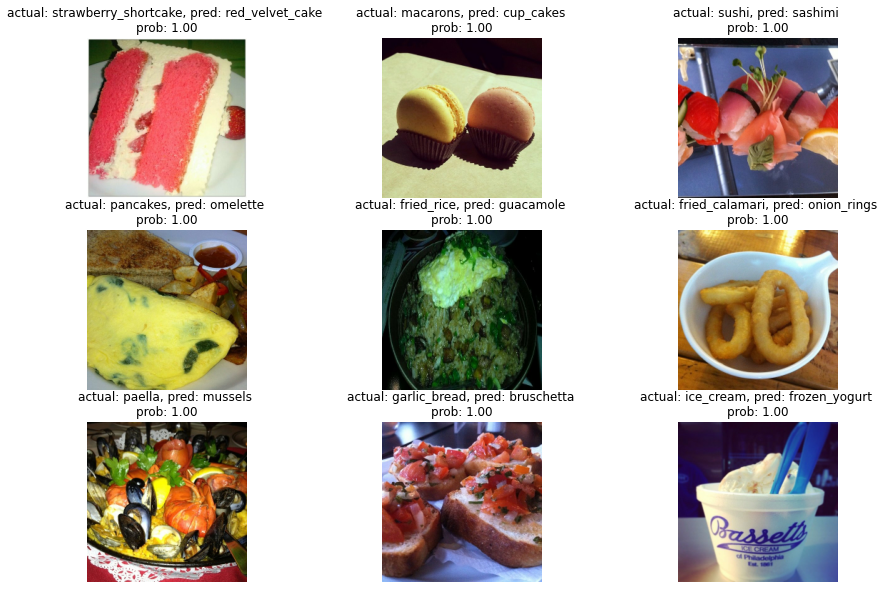

In [ ]:
# visualize some of the most wrong examples

images_to_view = 9
start_index = 0 # change the start index to view more
plt.figure(figsize=(15, 10))

# check all parameters of row
# for i, row in enumerate(top_100_wrong_prediction[start_index:start_index+images_to_view].itertuples()): 
  # print (row)

for i, row in enumerate(top_100_wrong_prediction[start_index:start_index+images_to_view].itertuples()): 
  plt.subplot(3, 3, i+1)
  img = load_prep_image(row[1], scale=True)
  _, _, _, _, pred_prob, y_true, y_pred, _ = row # only use pred_conf, y_true_classname, y_pred_classname parameters of each row 
  plt.imshow(img)
  plt.title(f"actual: {y_true}, pred: {y_pred} \nprob: {pred_prob:.2f}")
  plt.axis(False)

**Possible Cause of Wrong Prediction**

1. **Some of the labels might be wrong**. If the model ends up being good enough, it may actually learning to predict very well on certain classes. This means some images which the model predicts the right label may show up as wrong if the actual label is wrong.
2. If there's a recurring pattern for a certain class being poorly predicted on, perhaps we need to **collect more samples of that particular class** to improve the models.
3. **Visually similar**. The model tends to make wrong predictions (or get confused) on classes which are visually similar. For instance, predict strawberry_shortcake class getting mistaken as red_velvet_cake class.

### **Evaluation**

In [ ]:
# get accuracy score by comparing predicted classes to the actual labels
from sklearn.metrics import accuracy_score
sklearn_accuracy = accuracy_score(y_labels, pred_classes)
sklearn_accuracy

0.5784158415841584

In [ ]:
# get the class names
class_names = test_data.class_names
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

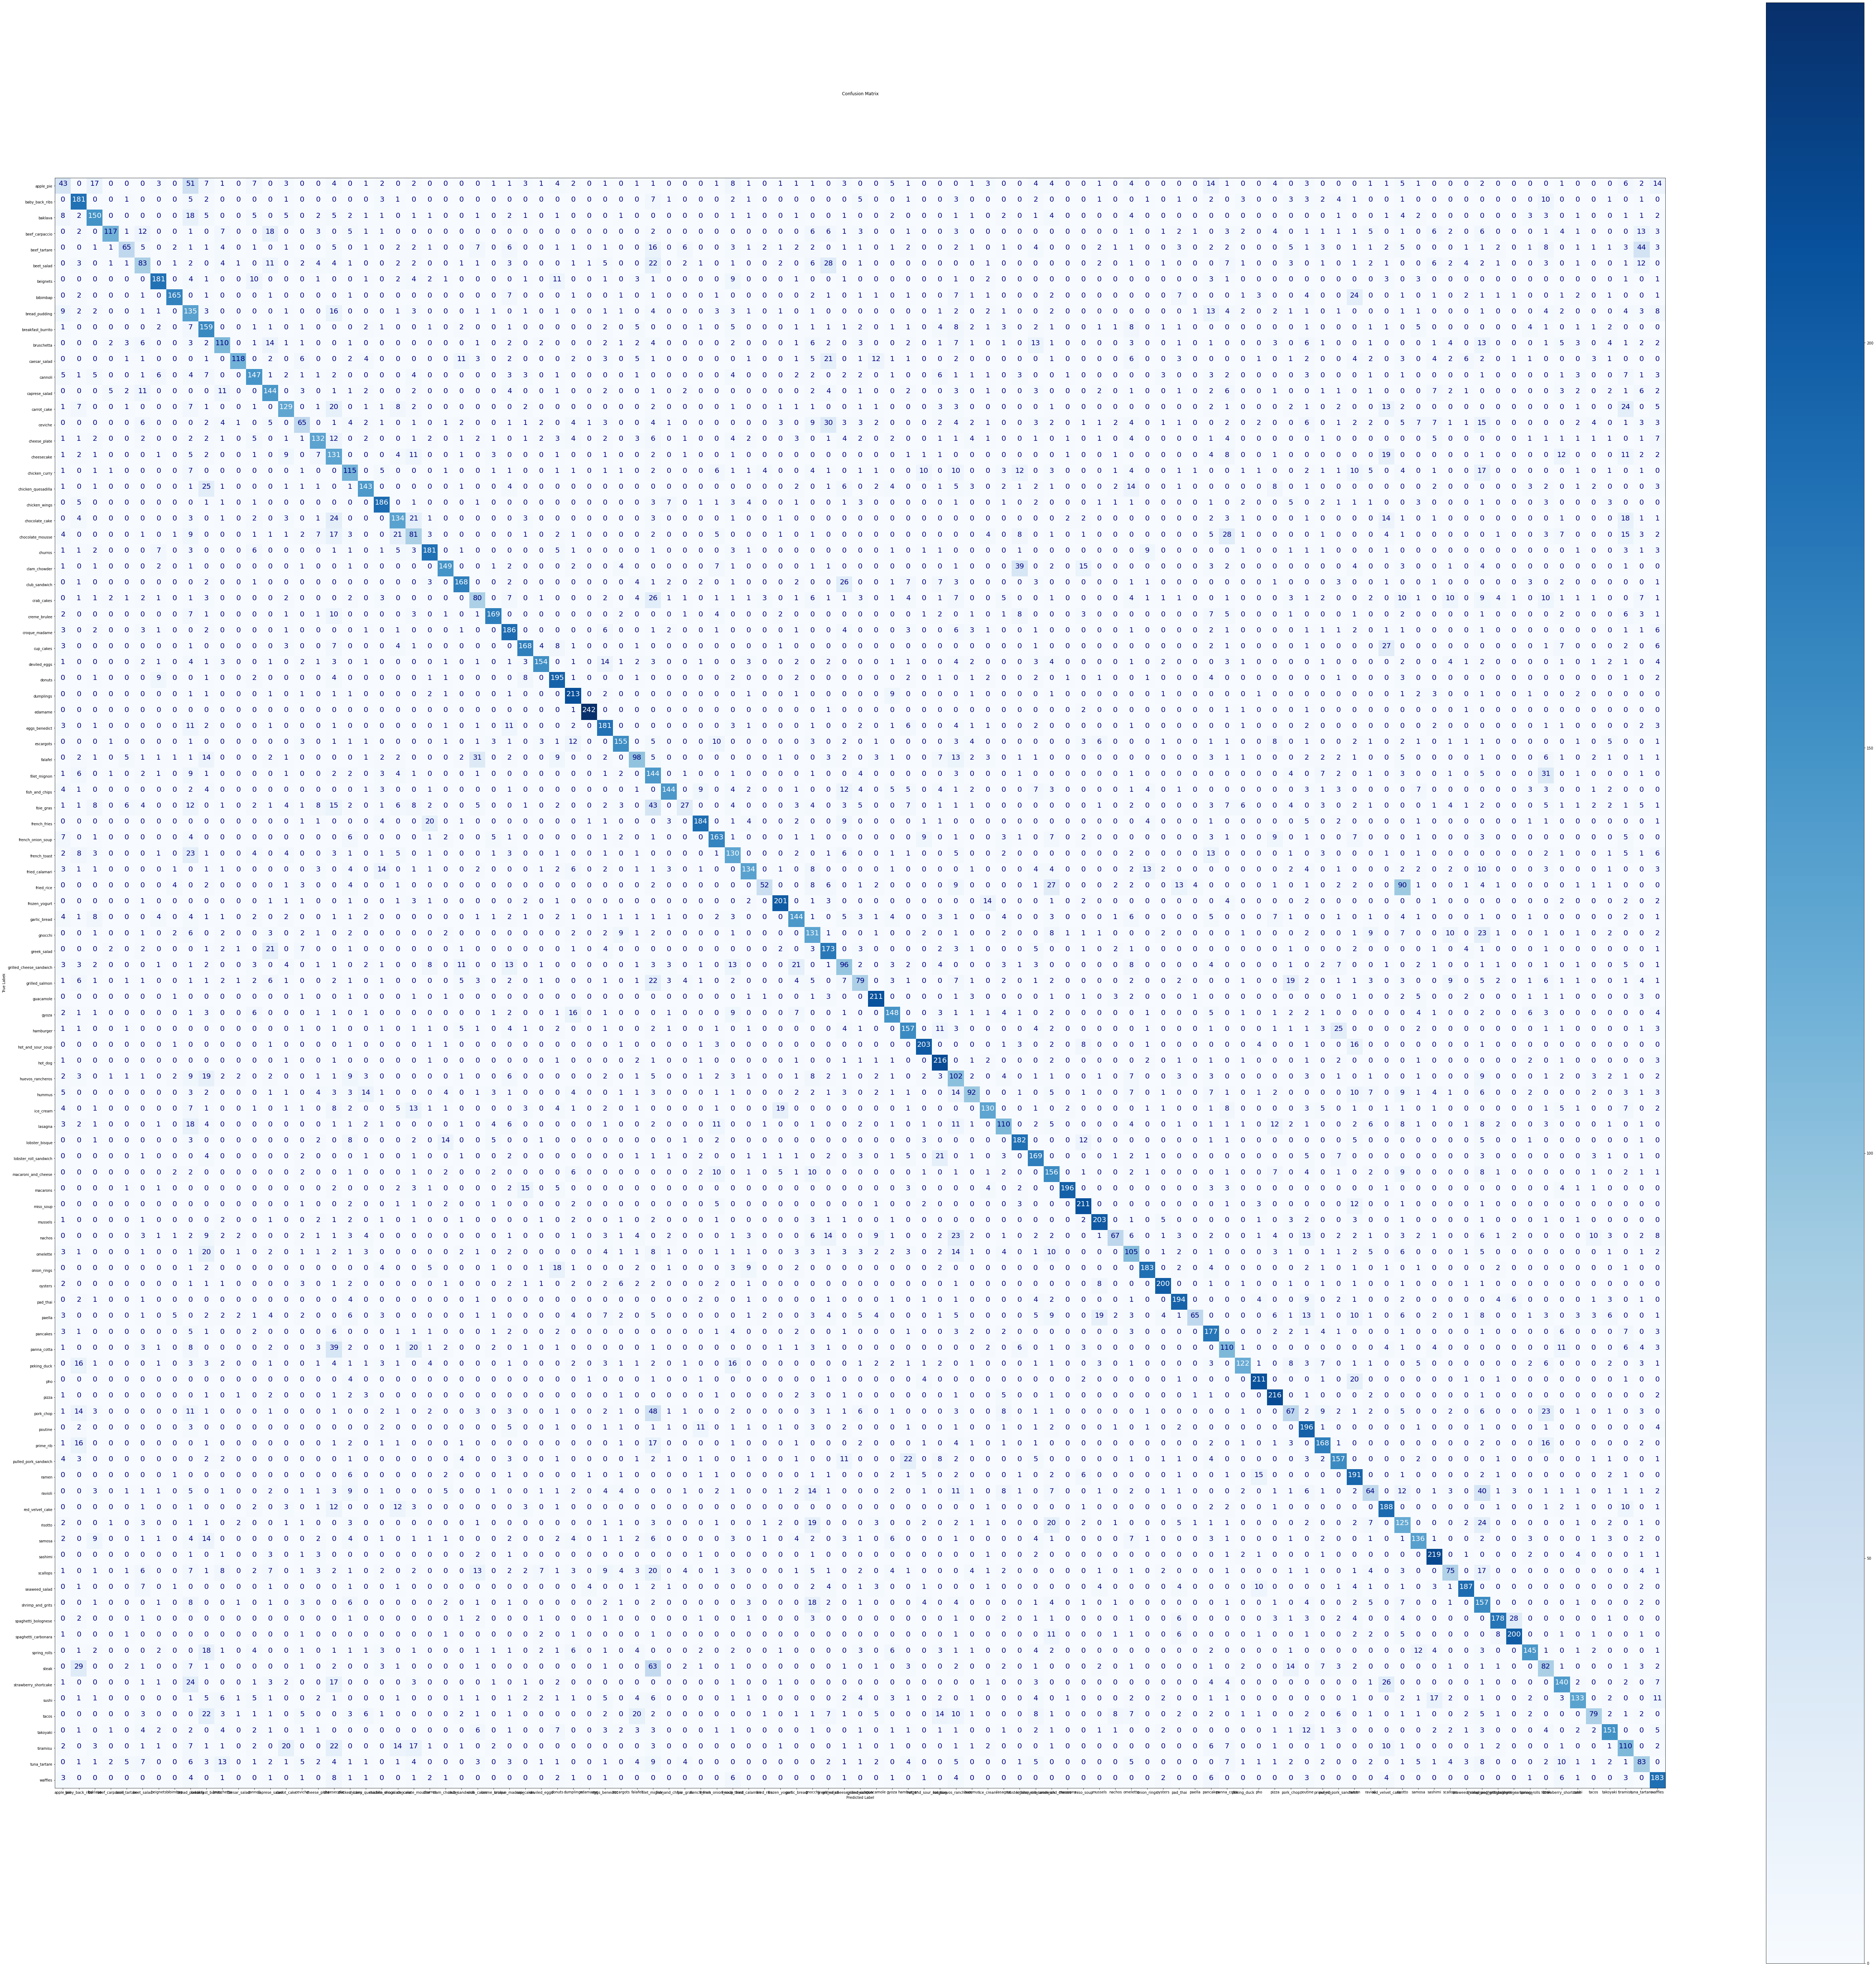

In [ ]:
# plot confusion matrix
create_confusion_matrix(y_true=y_labels,
                        y_pred=pred_classes,
                        classes=class_names,
                        figsize=(100,100),
                        text_size=20,
                        norm=False,
                        savefig=True)

The majority of class predictions are correct, it shown by the darker color on the top left to bottom right diagonal. 

The model get confused on some classes, for instances predict fried rice class getting mistaken as guacamole class, and predict apple_pie class getting mistaken as bread_pudding class.

The model tends to make wrong predictions (or get confused) on classes which are visually similar.

In [ ]:
# classification report

from sklearn.metrics import classification_report
print(classification_report(y_labels, pred_classes))

              precision    recall  f1-score   support

           0       0.26      0.17      0.21       250
           1       0.53      0.72      0.61       250
           2       0.61      0.60      0.61       250
           3       0.85      0.47      0.60       250
           4       0.64      0.26      0.37       250
           5       0.42      0.33      0.37       250
           6       0.76      0.72      0.74       250
           7       0.86      0.66      0.75       250
           8       0.26      0.54      0.35       250
           9       0.39      0.64      0.49       250
          10       0.53      0.44      0.48       250
          11       0.87      0.47      0.61       250
          12       0.63      0.59      0.61       250
          13       0.52      0.58      0.55       250
          14       0.60      0.52      0.56       250
          15       0.45      0.26      0.33       250
          16       0.64      0.53      0.58       250
          17       0.30    

1. **Precision** - Proportion of true positives over total number of samples. Higher precision leads to less false positives (model predicts 1 when it should've been 0).
2. **Recall** - Proportion of true positives over total number of true positives and false negatives (model predicts 0 when it should've been 1). Higher recall leads to less false negatives.
3. **F1 score** - Combines precision and recall into one metric. 1 is best, 0 is worst.

In [ ]:
# get a dictionary of the classification report

classification_report_dict = classification_report(y_labels, pred_classes, output_dict=True)
classification_report_dict

{'0': {'f1-score': 0.20722891566265061,
  'precision': 0.2606060606060606,
  'recall': 0.172,
  'support': 250},
 '1': {'f1-score': 0.6114864864864865,
  'precision': 0.5292397660818714,
  'recall': 0.724,
  'support': 250},
 '10': {'f1-score': 0.4793028322440087,
  'precision': 0.5263157894736842,
  'recall': 0.44,
  'support': 250},
 '100': {'f1-score': 0.5912762520193862,
  'precision': 0.4959349593495935,
  'recall': 0.732,
  'support': 250},
 '11': {'f1-score': 0.612987012987013,
  'precision': 0.8740740740740741,
  'recall': 0.472,
  'support': 250},
 '12': {'f1-score': 0.6061855670103092,
  'precision': 0.625531914893617,
  'recall': 0.588,
  'support': 250},
 '13': {'f1-score': 0.5485714285714286,
  'precision': 0.5236363636363637,
  'recall': 0.576,
  'support': 250},
 '14': {'f1-score': 0.5560344827586208,
  'precision': 0.602803738317757,
  'recall': 0.516,
  'support': 250},
 '15': {'f1-score': 0.3299492385786802,
  'precision': 0.4513888888888889,
  'recall': 0.26,
  'supp

In [ ]:
# create dictionary for each f1-score

class_f1_scores = {}

# Loop through classification report items
for k, v in classification_report_dict.items():
  if k == "accuracy": # stop once we get to accuracy key
    break
  else:
    # Append class names and f1-scores to new dictionary
    class_f1_scores[class_names[int(k)]] = v["f1-score"]
class_f1_scores

{'apple_pie': 0.20722891566265061,
 'baby_back_ribs': 0.6114864864864865,
 'baklava': 0.6072874493927126,
 'beef_carpaccio': 0.6030927835051547,
 'beef_tartare': 0.3703703703703704,
 'beet_salad': 0.3705357142857143,
 'beignets': 0.7433264887063654,
 'bibimbap': 0.748299319727891,
 'bread_pudding': 0.3534031413612566,
 'breakfast_burrito': 0.48549618320610693,
 'bruschetta': 0.4793028322440087,
 'caesar_salad': 0.612987012987013,
 'cannoli': 0.6061855670103092,
 'caprese_salad': 0.5485714285714286,
 'carrot_cake': 0.5560344827586208,
 'ceviche': 0.3299492385786802,
 'cheese_plate': 0.5776805251641137,
 'cheesecake': 0.3791606367583213,
 'chicken_curry': 0.44921875,
 'chicken_quesadilla': 0.6203904555314533,
 'chicken_wings': 0.7223300970873786,
 'chocolate_cake': 0.5392354124748491,
 'chocolate_mousse': 0.334020618556701,
 'churros': 0.7168316831683169,
 'clam_chowder': 0.6592920353982301,
 'club_sandwich': 0.7000000000000001,
 'crab_cakes': 0.3686635944700461,
 'creme_brulee': 0.73002

In [ ]:
# turn f1-scores into dataframe for visualization
import pandas as pd
f1_scores = pd.DataFrame({"class_name": list(class_f1_scores.keys()),
                          "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=False)
f1_scores

class_name  f1-score
33              edamame  0.966068
63             macarons  0.859649
75                  pho  0.822612
69              oysters  0.817996
91  spaghetti_carbonara  0.813008
..                  ...       ...
93                steak  0.319688
77            pork_chop  0.318290
82              ravioli  0.314496
0             apple_pie  0.207229
39            foie_gras  0.174194

[101 rows x 2 columns]

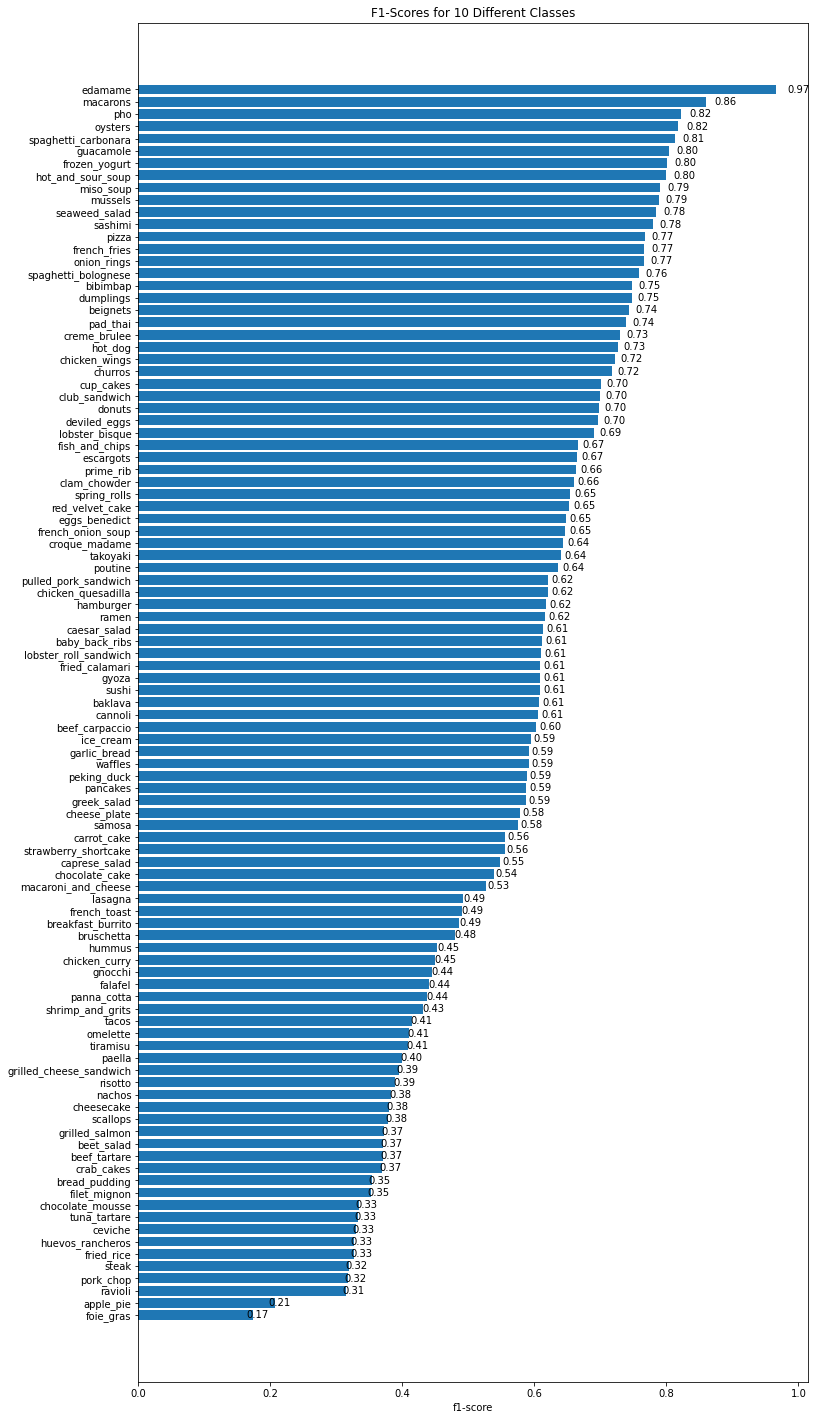

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 25))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(list(f1_scores["class_name"]))
ax.set_xlabel("f1-score")
ax.set_title("F1-Scores for 10 Different Classes")
ax.invert_yaxis(); # reverse the order

def autolabel(rects): # modified version of: https://matplotlib.org/examples/api/barchart_demo.html
  """
  Attach a text label above each bar displaying its height (it's value).
  """
  for rect in rects:
    width = rect.get_width()
    ax.text(1.035*width, rect.get_y() + rect.get_height(),
            f"{width:.2f}",
            ha='center', va='bottom')

autolabel(scores)

The model performed great on predicting classes like edamame, macarons, pho and oysters, but poor on predicting classes like foie_gras, apple_pie, ravioli, and pork_chop. Perhaps we have to collect more data on poor performing classes.

### **Testing Model on Custom Images**

In [ ]:
!wget -q https://raw.githubusercontent.com/dinachoir/Convolutional-Neural-Network/main/01-chicken_wings.jpg
!wget -q https://raw.githubusercontent.com/dinachoir/Convolutional-Neural-Network/main/01-pizza.jpg
!wget -q https://raw.githubusercontent.com/dinachoir/Convolutional-Neural-Network/main/01-fried_rice.jpg
!wget -q https://raw.githubusercontent.com/dinachoir/Convolutional-Neural-Network/main/01-ramen.jpg

In [ ]:
custom_food_images = ["/content/01-chicken_wings.jpg","/content/01-fried_rice.jpg","/content/01-pizza.jpg","/content/01-ramen.jpg"]
custom_food_images

['/content/01-chicken_wings.jpg',
 '/content/01-fried_rice.jpg',
 '/content/01-pizza.jpg',
 '/content/01-ramen.jpg']

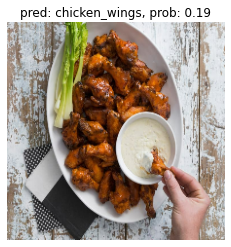

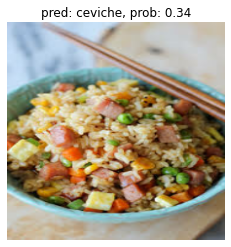

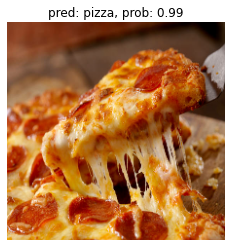

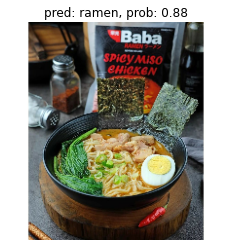

In [ ]:
# make predictions on custom food images

for img in custom_food_images:
  img = load_prep_image(img, scale=False) # load in target image and turn it into tensor
  pred_prob = model.predict(tf.expand_dims(img, axis=0)) # make prediction on image with shape [None, 224, 224, 3]
  pred_class = class_names[pred_prob.argmax()] # find the predicted class label
  
  # plot the image
  plt.figure()
  plt.imshow(img/255.) # imshow() requires float inputs to be normalized
  plt.title(f"pred: {pred_class}, prob: {pred_prob.max():.2f}")
  plt.axis(False)

Testing model results that 3 out of 4 custom images are correctly predicted. Fried rice image is getting mistaken as Ceviche. Indeed, fried rice and ceviche have similar looks, that's why the model get confused in predicting. Also the model itself has poor performance at predicting Fried_rice class (according to f1-score).